In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

In [122]:
#importing intraday_heartrate data into DataFrames from df1 to df28

folder = './'

filelist = [file for file in os.listdir(folder) if file.startswith("intraday_heartrate_2021-02-")]
i=1
data = []
for file in filelist:
    exec("df%d = pd.read_csv('%s')" % (i, os.path.join(folder,file)))
    exec("df%d['filename'] = '%s'" % (i,os.path.basename(file).split('.')[0].split('_')[2]+" "))
    exec("data.append(df%d)" % (i))
    i=i+1
    
df1.head()

,Time,HeartRate,filename
0,00:00:00,75,2021-02-01
1,00:00:05,74,2021-02-01
2,00:00:10,73,2021-02-01
3,00:00:25,73,2021-02-01
4,00:00:35,73,2021-02-01


In [580]:
df1

,HeartRate
Time,
2021-02-01 00:00:00,73.333333
2021-02-01 00:01:00,73.444444
2021-02-01 00:02:00,73.200000
2021-02-01 00:03:00,73.714286
2021-02-01 00:04:00,74.625000
...,...
2021-02-01 23:54:00,85.333333
2021-02-01 23:55:00,85.444444
2021-02-01 23:56:00,79.916667


In [123]:
#merge column date(filename) and time

for i in range(1,29):
    exec("df%d['Time'] = df%d['filename'] +" "+ df%d['Time']"%(i,i,i))
    exec("df%d.drop(['filename'],axis=1,inplace=True)"%(i))
    
df28.head()

,Time,HeartRate
0,2021-02-28 00:00:03,94
1,2021-02-28 00:00:08,95
2,2021-02-28 00:00:13,92
3,2021-02-28 00:00:18,93
4,2021-02-28 00:00:23,92


In [124]:
#convert into dfi['Time'] to timestamp

for i in range(1,29):
    exec("df%d['Time'] = pd.to_datetime(df%d['Time'])"%(i,i))
    
df10.head()

,Time,HeartRate
0,2021-02-10 00:00:05,83
1,2021-02-10 00:00:10,83
2,2021-02-10 00:00:25,83
3,2021-02-10 00:00:35,83
4,2021-02-10 00:00:40,84


In [125]:
df1.dtypes

Time         datetime64[ns]
HeartRate             int64
dtype: object

In [126]:
#converting datetime64[ns] to DatetimeIndex

for i in range(1,29):
    exec("df%d=df%d.set_index(['Time'])"%(i,i))
    #exec("df%d.drop(['Time'],axis=1,inplace=True)"%(i))

df10.head()

,HeartRate
Time,
2021-02-10 00:00:05,83
2021-02-10 00:00:10,83
2021-02-10 00:00:25,83
2021-02-10 00:00:35,83
2021-02-10 00:00:40,84


In [127]:
df1.index

DatetimeIndex(['2021-02-01 00:00:00', '2021-02-01 00:00:05',
               '2021-02-01 00:00:10', '2021-02-01 00:00:25',
               '2021-02-01 00:00:35', '2021-02-01 00:00:40',
               '2021-02-01 00:00:45', '2021-02-01 00:00:50',
               '2021-02-01 00:00:55', '2021-02-01 00:01:00',
               ...
               '2021-02-01 23:58:13', '2021-02-01 23:58:18',
               '2021-02-01 23:58:23', '2021-02-01 23:58:28',
               '2021-02-01 23:58:33', '2021-02-01 23:58:38',
               '2021-02-01 23:58:43', '2021-02-01 23:58:48',
               '2021-02-01 23:58:53', '2021-02-01 23:58:58'],
              dtype='datetime64[ns]', name='Time', length=12397, freq=None)

In [128]:
#Averaging seconds level heart rate for each minute to get a minute level heart rate.
for i in range(1,29):
    exec("df%d=df%d['HeartRate'].resample('1Min').mean()"%(i,i))
    #df1=df1['HeartRate'].resample('1Min').mean()
    exec("df%d=pd.DataFrame(df%d)"%(i,i))
    
df15.head()

,HeartRate
Time,
2021-02-15 00:00:00,80.500000
2021-02-15 00:01:00,77.000000
2021-02-15 00:02:00,77.200000
2021-02-15 00:03:00,78.666667
2021-02-15 00:04:00,79.333333


In [582]:
#importing intraday_sleep data into DataFrames from df1_sleep to df28_sleep

folder = './'

filelist = [file for file in os.listdir(folder) if file.startswith("intraday_sleep_2021-02-")]
i=1
data = []
for file in filelist:
    print(file)
    exec("df%d_sleep = pd.read_csv('%s')" % (i, os.path.join(folder,file)))
    exec("df%d_sleep['filename'] = '%s'" % (i,os.path.basename(file).split('.')[0].split('_')[2]+" "))
    exec("data.append(df%d_sleep)" % (i))
    if i==22 or i==25:
        i+=2
    else:
        i+=1
    
df1_sleep.head()

intraday_sleep_2021-02-01.csv
intraday_sleep_2021-02-02.csv
intraday_sleep_2021-02-03.csv
intraday_sleep_2021-02-04.csv
intraday_sleep_2021-02-05.csv
intraday_sleep_2021-02-06.csv
intraday_sleep_2021-02-07.csv
intraday_sleep_2021-02-08.csv
intraday_sleep_2021-02-09.csv
intraday_sleep_2021-02-10.csv
intraday_sleep_2021-02-11.csv
intraday_sleep_2021-02-12.csv
intraday_sleep_2021-02-13.csv
intraday_sleep_2021-02-14.csv
intraday_sleep_2021-02-15.csv
intraday_sleep_2021-02-16.csv
intraday_sleep_2021-02-17.csv
intraday_sleep_2021-02-18.csv
intraday_sleep_2021-02-19.csv
intraday_sleep_2021-02-20.csv
intraday_sleep_2021-02-21.csv
intraday_sleep_2021-02-22.csv
intraday_sleep_2021-02-24.csv
intraday_sleep_2021-02-25.csv
intraday_sleep_2021-02-27.csv
intraday_sleep_2021-02-28.csv


,Timestamp,Minutes Asleep,Sleep Type,filename
0,2021-02-01T00:13:30.000,26,light,2021-02-01
1,2021-02-01T00:40:00.000,5,deep,2021-02-01
2,2021-02-01T00:45:30.000,10,light,2021-02-01
3,2021-02-01T00:55:30.000,4,rem,2021-02-01
4,2021-02-01T01:00:00.000,35,light,2021-02-01


In [141]:
del df23_sleep
del df26_sleep
df26_sleep.head()

NameError: name 'df23_sleep' is not defined

In [584]:
#importing intraday_steps_cal_elev data into DataFrames from df1_step to df28_step

folder = './'

filelist = [file for file in os.listdir(folder) if file.startswith("intraday_steps_cal_elev_2021-02-")]
i=1
data = []
for file in filelist:
    exec("df%d_step = pd.read_csv('%s')" % (i, os.path.join(folder,file)))
    exec("df%d_step['filename'] = '%s'" % (i,os.path.basename(file).split('.')[0].split('_')[4]+" "))
    exec("data.append(df%d_step)" % (i))
    i=i+1
    
df1_step.head()

,Time,Steps,Calories Burnt,Elevation (m),filename
0,00:00,0,1.30310,0,2021-02-01
1,00:01,0,1.30310,0,2021-02-01
2,00:02,0,1.43341,0,2021-02-01
3,00:03,0,1.30310,0,2021-02-01
4,00:04,0,1.30310,0,2021-02-01


In [585]:
#merge column date(filename) and Time

for i in range(1,29):
    exec("df%d_step['Time'] = df%d_step['filename'] +" "+ df%d_step['Time']"%(i,i,i))
    exec("df%d_step.drop(['filename'],axis=1,inplace=True)"%(i))
    
df1_step.head()

,Time,Steps,Calories Burnt,Elevation (m)
0,2021-02-01 00:00,0,1.30310,0
1,2021-02-01 00:01,0,1.30310,0
2,2021-02-01 00:02,0,1.43341,0
3,2021-02-01 00:03,0,1.30310,0
4,2021-02-01 00:04,0,1.30310,0


In [158]:
print(df1_sleep.dtypes)
print(df1_step.dtypes)

Timestamp         datetime64[ns]
Minutes Asleep             int64
Sleep Type                object
filename                  object
dtype: object
Time               object
Steps               int64
Calories Burnt    float64
Elevation (m)       int64
dtype: object


In [145]:
for i in range(1,29):
    if(i==23 or i==26):
        continue
    exec("df%d_sleep['Timestamp'] = pd.to_datetime(df%d_sleep['Timestamp'])"%(i,i))
    
print(df1_sleep.dtypes)

Timestamp         datetime64[ns]
Minutes Asleep             int64
Sleep Type                object
filename                  object
dtype: object


In [159]:
#convert into dfi['Time'] to timestamp

for i in range(1,29):
    exec("df%d_step['Time'] = pd.to_datetime(df%d_step['Time'])"%(i,i))
    
print(df1_step.dtypes)

Time              datetime64[ns]
Steps                      int64
Calories Burnt           float64
Elevation (m)              int64
dtype: object


In [160]:
print(df1)
print(df1_sleep)
print(df1_step)

                     HeartRate
Time                          
2021-02-01 00:00:00  73.333333
2021-02-01 00:01:00  73.444444
2021-02-01 00:02:00  73.200000
2021-02-01 00:03:00  73.714286
2021-02-01 00:04:00  74.625000
...                        ...
2021-02-01 23:54:00  85.333333
2021-02-01 23:55:00  85.444444
2021-02-01 23:56:00  79.916667
2021-02-01 23:57:00  74.750000
2021-02-01 23:58:00  72.250000

[1439 rows x 1 columns]
             Timestamp  Minutes Asleep Sleep Type     filename
0  2021-02-01 00:13:30              26      light  2021-02-01 
1  2021-02-01 00:40:00               5       deep  2021-02-01 
2  2021-02-01 00:45:30              10      light  2021-02-01 
3  2021-02-01 00:55:30               4        rem  2021-02-01 
4  2021-02-01 01:00:00              35      light  2021-02-01 
5  2021-02-01 01:35:00               7       wake  2021-02-01 
6  2021-02-01 01:42:30               0      light  2021-02-01 
7  2021-02-01 01:43:00              11        rem  2021-02-01 
8  20

In [586]:
#converting datetime64[ns] to DatetimeIndex

for i in range(1,29):
    exec("df%d_step=df%d_step.set_index(['Time'])"%(i,i))
    #exec("df%d.drop(['Time'],axis=1,inplace=True)"%(i))

df1_step.head()

,Steps,Calories Burnt,Elevation (m)
Time,,,
2021-02-01 00:00,0,1.30310,0
2021-02-01 00:01,0,1.30310,0
2021-02-01 00:02,0,1.43341,0
2021-02-01 00:03,0,1.30310,0
2021-02-01 00:04,0,1.30310,0


In [162]:
for i in range(1,29):
    if(i==23 or i==26):
        continue
    exec("df%d_sleep.rename(columns={'Timestamp': 'Time'},inplace=True)"%(i))
    exec("df%d_sleep=df%d_sleep.set_index(['Time'])"%(i,i))
    
df1_sleep.head()

,Minutes Asleep,Sleep Type,filename
Time,,,
2021-02-01 00:13:30,26,light,2021-02-01
2021-02-01 00:40:00,5,deep,2021-02-01
2021-02-01 00:45:30,10,light,2021-02-01
2021-02-01 00:55:30,4,rem,2021-02-01
2021-02-01 01:00:00,35,light,2021-02-01


In [176]:
print (pd.merge(df27,pd.merge(df27_step,df27_sleep, on='Time',how='left'), on='Time',how='left'))
#make a NaN dataframe for df23_sleep and df26_sleep

                     HeartRate  Steps  Calories Burnt  Elevation (m)  \
Time                                                                   
2021-02-27 00:00:00  82.750000      0         1.30310              0   
2021-02-27 00:01:00  84.400000      0         1.30310              0   
2021-02-27 00:02:00  86.666667      0         1.30310              0   
2021-02-27 00:03:00  87.000000      0         1.30310              0   
2021-02-27 00:04:00  87.750000      0         1.69403              0   
...                        ...    ...             ...            ...   
2021-02-27 23:54:00  80.285714      0         1.30310              0   
2021-02-27 23:55:00  81.800000      0         1.43341              0   
2021-02-27 23:56:00  84.200000      0         1.43341              0   
2021-02-27 23:57:00  89.000000      0         1.69403              0   
2021-02-27 23:58:00  87.555556      6         3.12744              0   

                     Minutes Asleep Sleep Type filename  
Time 

In [180]:
#creating dummy df23_sleep and df26_sleep dataframe
import numpy as np

df23_sleep=df1_sleep
df26_sleep=df1_sleep

a=['Minutes Asleep','Sleep Type','filename']
for i in a:
    df23_sleep[i]=np.nan
    df26_sleep[i]=np.nan
    
df23_sleep.head()

,Minutes Asleep,Sleep Type,filename
Time,,,
2021-02-01 00:13:30,NaN,NaN,NaN
2021-02-01 00:40:00,NaN,NaN,NaN
2021-02-01 00:45:30,NaN,NaN,NaN
2021-02-01 00:55:30,NaN,NaN,NaN
2021-02-01 01:00:00,NaN,NaN,NaN


In [181]:
#merging columns of all dataframes
for i in range(1,29):
    exec("d%d_allcols = pd.merge(df%d,pd.merge(df%d_step,df%d_sleep, on='Time',how='left'), on='Time',how='left')"%(i,i,i,i))

d1_allcols.head()

,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Sleep Type,filename
Time,,,,,,,
2021-02-01 00:00:00,73.333333,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:01:00,73.444444,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:02:00,73.200000,0,1.43341,0,NaN,NaN,NaN
2021-02-01 00:03:00,73.714286,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:04:00,74.625000,0,1.30310,0,NaN,NaN,NaN


In [184]:
#merging all di_allcols into a single dataframe

list_di_allcols=[d2_allcols,d3_allcols,d4_allcols,d5_allcols,d6_allcols,d7_allcols,d8_allcols,d9_allcols,d10_allcols,d11_allcols,d12_allcols,d13_allcols,d14_allcols,d15_allcols,d16_allcols,d17_allcols,d18_allcols,d19_allcols,d20_allcols,d21_allcols,d22_allcols,d23_allcols,d24_allcols,d25_allcols,d26_allcols,d27_allcols,d28_allcols]

df_feb_data=d1_allcols.append(list_di_allcols)
df_feb_data.head()

,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Sleep Type,filename
Time,,,,,,,
2021-02-01 00:00:00,73.333333,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:01:00,73.444444,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:02:00,73.200000,0,1.43341,0,NaN,NaN,NaN
2021-02-01 00:03:00,73.714286,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:04:00,74.625000,0,1.30310,0,NaN,NaN,NaN


In [187]:
#dataframe having data for the entire month
df_feb_data

,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Sleep Type,filename
Time,,,,,,,
2021-02-01 00:00:00,73.333333,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:01:00,73.444444,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:02:00,73.200000,0,1.43341,0,NaN,NaN,NaN
2021-02-01 00:03:00,73.714286,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:04:00,74.625000,0,1.30310,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-28 12:51:00,96.636364,0,1.56372,0,NaN,NaN,NaN
2021-02-28 12:52:00,95.900000,0,1.69403,0,NaN,NaN,NaN
2021-02-28 12:53:00,96.222222,0,1.69403,0,NaN,NaN,NaN


In [188]:
# filters resting heart rate

df_feb_data['Steps_window_12'] = df_feb_data['Steps'].rolling(12).sum()
df_feb_data = df_feb_data.loc[(df_feb_data['Steps_window_12'] == 0)]
df_feb_data #only has resting heart rate data

,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Sleep Type,filename,Steps_window_12
Time,,,,,,,,
2021-02-01 00:11:00,86.444444,0,1.30310,0,NaN,NaN,NaN,0.0
2021-02-01 00:12:00,82.666667,0,1.30310,0,NaN,NaN,NaN,0.0
2021-02-01 00:13:00,79.888889,0,1.30310,0,NaN,NaN,NaN,0.0
2021-02-01 00:14:00,78.500000,0,1.30310,0,NaN,NaN,NaN,0.0
2021-02-01 00:15:00,76.666667,0,1.30310,0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
2021-02-28 12:51:00,96.636364,0,1.56372,0,NaN,NaN,NaN,0.0
2021-02-28 12:52:00,95.900000,0,1.69403,0,NaN,NaN,NaN,0.0
2021-02-28 12:53:00,96.222222,0,1.69403,0,NaN,NaN,NaN,0.0


In [191]:
df_feb_data.describe()

,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Steps_window_12
count,20362.000000,21461.0,21461.000000,21461.0,179.000000,21461.0
mean,80.890539,0.0,1.408564,0.0,16.268156,0.0
std,10.424235,0.0,0.352552,0.0,14.057492,0.0
min,43.000000,0.0,1.303100,0.0,0.000000,0.0
25%,72.833333,0.0,1.303100,0.0,5.000000,0.0
50%,80.000000,0.0,1.303100,0.0,11.000000,0.0
75%,87.285714,0.0,1.433410,0.0,24.500000,0.0
max,144.454545,0.0,12.249140,0.0,83.000000,0.0


In [192]:
df_feb_data.dtypes

HeartRate          float64
Steps                int64
Calories Burnt     float64
Elevation (m)        int64
Minutes Asleep     float64
Sleep Type          object
filename            object
Steps_window_12    float64
dtype: object

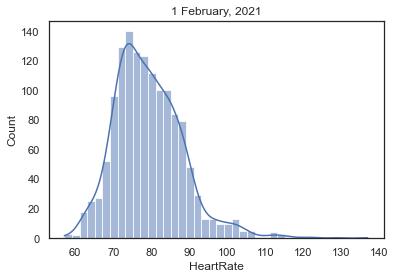

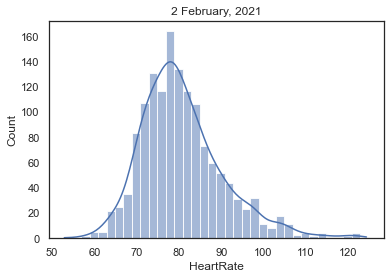

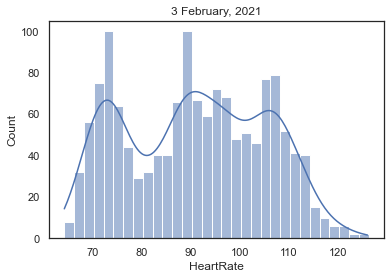

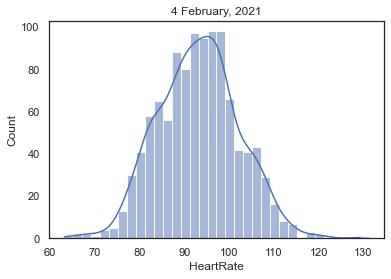

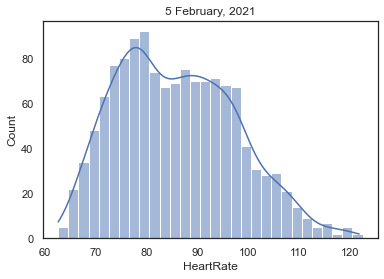

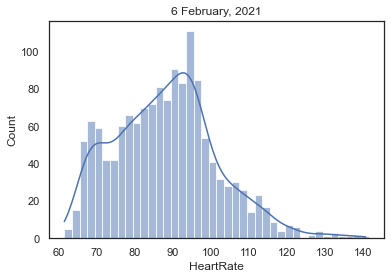

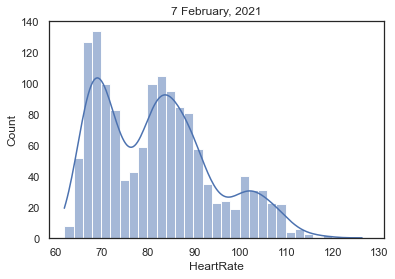

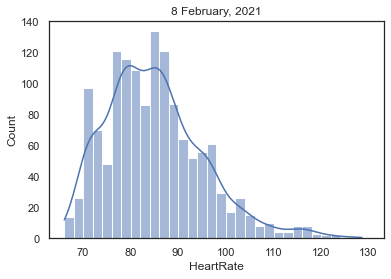

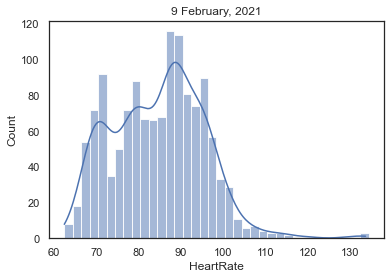

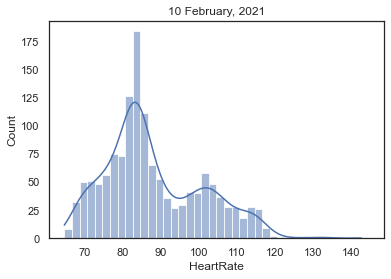

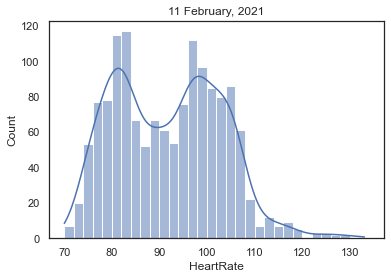

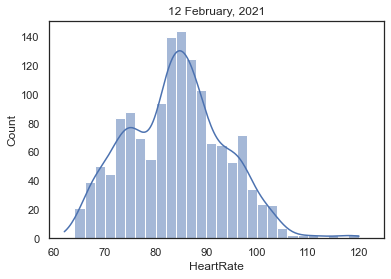

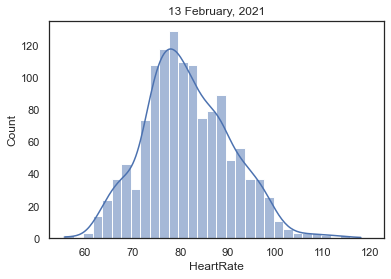

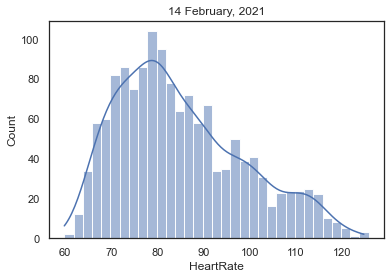

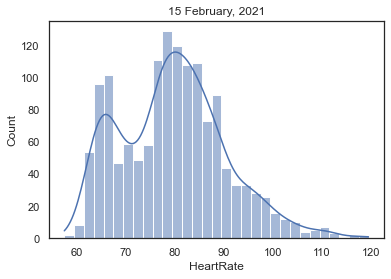

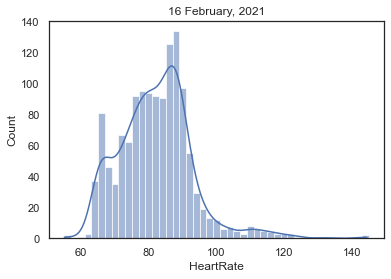

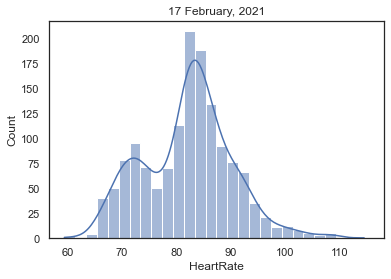

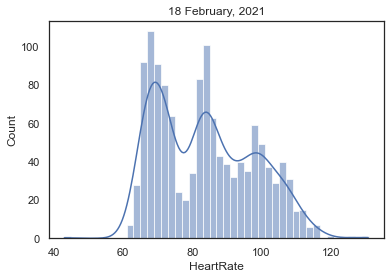

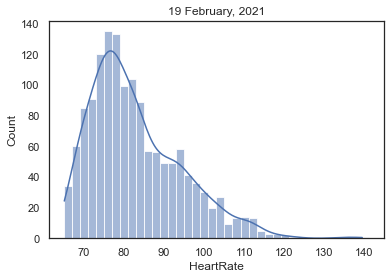

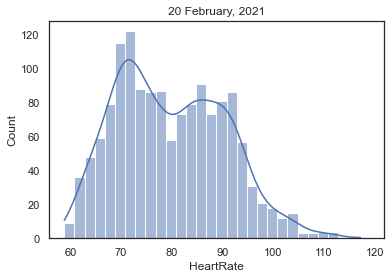

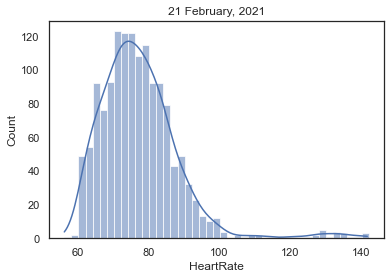

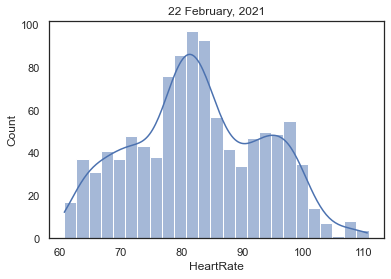

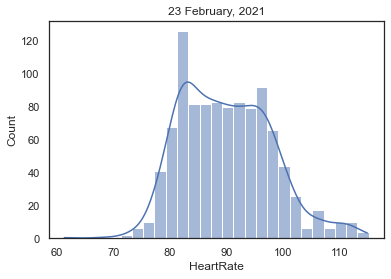

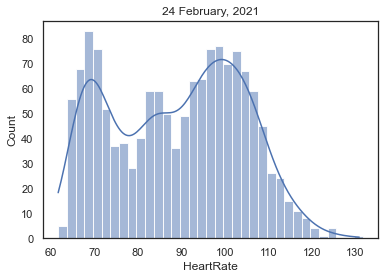

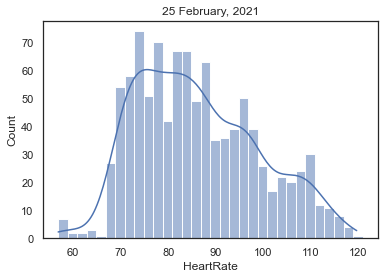

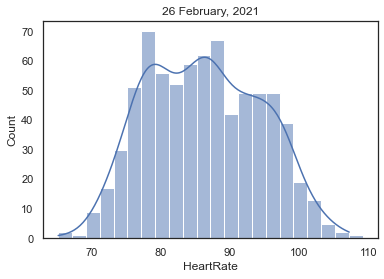

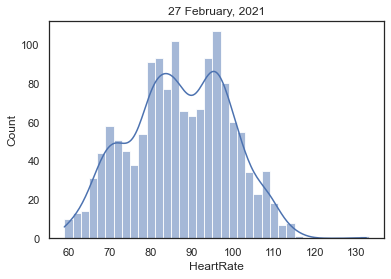

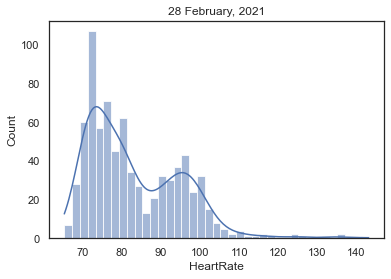

In [445]:
#heart rate distributions everyday

for i in range(1,29):
    exec("sns.histplot(df%d['HeartRate'],binwidth=2,kde=True)"%(i))
    exec("title='%d February, 2021'"%(i))
    exec("plt.title('%s')"%(title))
    exec("plt.savefig('%shistplot.jpg', dpi=300, bbox_inches='tight')"%(title))
    exec("plt.show()")


[]

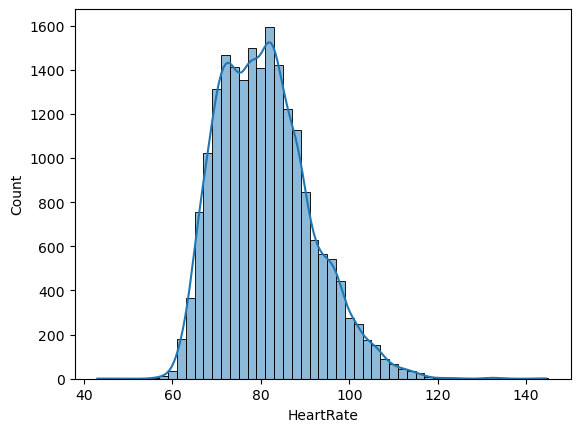

In [571]:
#resting heart rate ka distribution

sns.histplot(data=df_feb_data,x='HeartRate',binwidth=2,kde=True)
plt.plot()

In [238]:
df_feb_data.drop(['filename'],axis=1,inplace=True)


In [240]:
df_feb_data

,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Sleep Type,Steps_window_12
Time,,,,,,,
2021-02-01 00:11:00,86.444444,0,1.30310,0,NaN,NaN,0.0
2021-02-01 00:12:00,82.666667,0,1.30310,0,NaN,NaN,0.0
2021-02-01 00:13:00,79.888889,0,1.30310,0,NaN,NaN,0.0
2021-02-01 00:14:00,78.500000,0,1.30310,0,NaN,NaN,0.0
2021-02-01 00:15:00,76.666667,0,1.30310,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...
2021-02-28 12:51:00,96.636364,0,1.56372,0,NaN,NaN,0.0
2021-02-28 12:52:00,95.900000,0,1.69403,0,NaN,NaN,0.0
2021-02-28 12:53:00,96.222222,0,1.69403,0,NaN,NaN,0.0


In [244]:
trial=df_feb_data.drop(['Calories Burnt','Elevation (m)','Minutes Asleep','Sleep Type','Steps_window_12'],axis=1)

# smooth data
trial_nonas = trial.dropna()
trial_rom = trial_nonas.rolling(400).mean()
# resample
trial_resmp = trial_rom.resample('1H').mean()
trial2 = trial_resmp.drop(['Steps'], axis=1)
trial2 = trial2.dropna()
trial2

,HeartRate
Time,
2021-02-01 12:00:00,74.591902
2021-02-01 13:00:00,75.065525
2021-02-01 15:00:00,75.529348
2021-02-01 16:00:00,76.726364
2021-02-01 17:00:00,77.811127
...,...
2021-02-28 08:00:00,77.947940
2021-02-28 09:00:00,77.266460
2021-02-28 10:00:00,77.526292


In [246]:
#Standardize the data with zero meann and unit variance (Z-score)

from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(trial2.values)
data_scaled_features = pd.DataFrame(data_scaled, index=trial2.index, columns=trial2.columns)
data_df = pd.DataFrame(data_scaled_features)
data = pd.DataFrame(data_df).fillna(0)

data

,HeartRate
Time,
2021-02-01 12:00:00,-0.980829
2021-02-01 13:00:00,-0.901080
2021-02-01 15:00:00,-0.822981
2021-02-01 16:00:00,-0.621427
2021-02-01 17:00:00,-0.438773
...,...
2021-02-28 08:00:00,-0.415736
2021-02-28 09:00:00,-0.530485
2021-02-28 10:00:00,-0.486734


In [248]:
#This function takes the standardized data and detects outliers using Gaussian density estimation.
from sklearn.covariance import EllipticEnvelope

model =  EllipticEnvelope(contamination=0.1,random_state=10, support_fraction=0.7)

model.fit(data)
preds = pd.DataFrame(model.predict(data))
preds = preds.rename(lambda x: 'anomaly' if x == 0 else x, axis=1)
data = data.reset_index()
data = data.join(preds)

data

,Time,HeartRate,anomaly
0,2021-02-01 12:00:00,-0.980829,1
1,2021-02-01 13:00:00,-0.901080,1
2,2021-02-01 15:00:00,-0.822981,1
3,2021-02-01 16:00:00,-0.621427,1
4,2021-02-01 17:00:00,-0.438773,1
...,...,...,...
594,2021-02-28 08:00:00,-0.415736,1
595,2021-02-28 09:00:00,-0.530485,1
596,2021-02-28 10:00:00,-0.486734,1
597,2021-02-28 11:00:00,-0.402529,1


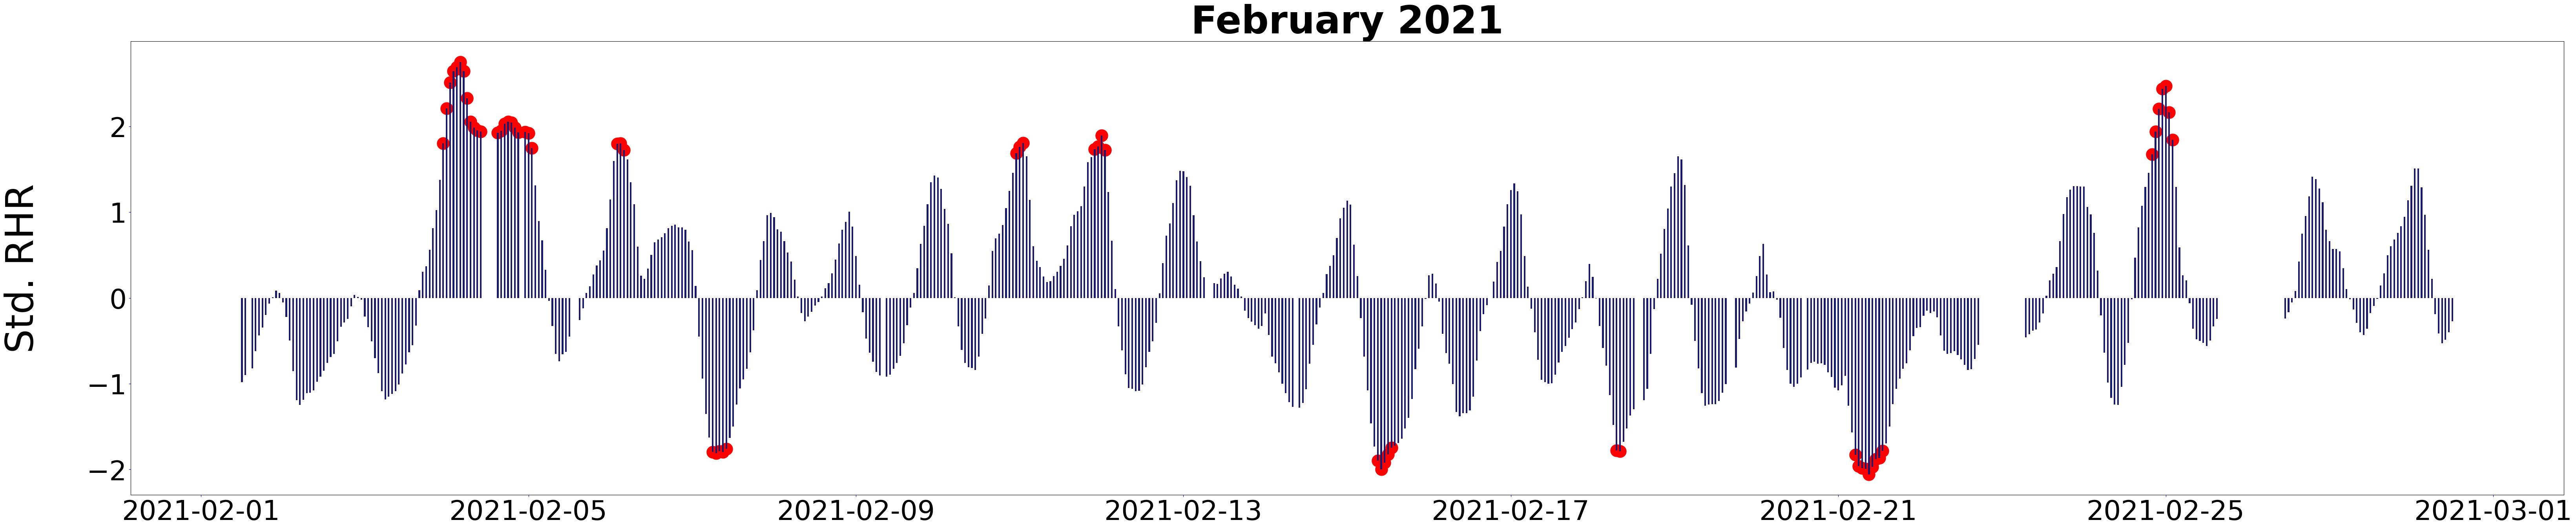

In [450]:
#plt.style.context('fivethirtyeight')
plt.rcdefaults()
fig, ax = plt.subplots(1, figsize=(80,15))
a = data.loc[data['anomaly'] == -1, ('Time', 'HeartRate')] #anomaly
b = a[(a['HeartRate'] > 0)]
ax.bar(data['Time'], data['HeartRate'], linestyle='-',color='midnightblue' ,lw=6, width=0.02)
ax.scatter(a['Time'],a['HeartRate'], color='red', label='Anomaly', s=500) #used a instead of b

ax.tick_params(axis='both', which='major', color='blue', labelsize=50)
ax.tick_params(axis='both', which='minor', color='blue', labelsize=50)
ax.set_title('February 2021',fontweight="bold", size=70) # Title
ax.set_ylabel('Std. RHR\n', fontsize = 70) 

plt.plot()
plt.savefig('RHR.jpg', dpi=300, bbox_inches='tight')

In [271]:
df_feb_alldata=d1_allcols.append(list_di_allcols)

In [275]:
df_feb_alldata

,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Sleep Type,filename
Time,,,,,,,
2021-02-01 00:00:00,73.333333,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:01:00,73.444444,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:02:00,73.200000,0,1.43341,0,NaN,NaN,NaN
2021-02-01 00:03:00,73.714286,0,1.30310,0,NaN,NaN,NaN
2021-02-01 00:04:00,74.625000,0,1.30310,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-28 12:51:00,96.636364,0,1.56372,0,NaN,NaN,NaN
2021-02-28 12:52:00,95.900000,0,1.69403,0,NaN,NaN,NaN
2021-02-28 12:53:00,96.222222,0,1.69403,0,NaN,NaN,NaN


In [276]:
hros=df_feb_alldata.drop(['Calories Burnt','Elevation (m)','Minutes Asleep','Sleep Type','filename'],axis=1)
hros["Steps"] = hros["Steps"].apply(lambda x: x + 1)
hros['HeartRate'] = (hros['HeartRate']/hros['Steps']) 
hros

,HeartRate,Steps
Time,,
2021-02-01 00:00:00,73.333333,1
2021-02-01 00:01:00,73.444444,1
2021-02-01 00:02:00,73.200000,1
2021-02-01 00:03:00,73.714286,1
2021-02-01 00:04:00,74.625000,1
...,...,...
2021-02-28 12:51:00,96.636364,1
2021-02-28 12:52:00,95.900000,1
2021-02-28 12:53:00,96.222222,1


In [277]:
# smooth data
hros_nonas = hros.dropna()
hros_rom = hros_nonas.rolling(400).mean()
# resample
hros2 = hros_rom.resample('1H').mean()
hros2 = hros2.dropna()

hros2

,HeartRate,Steps
Time,,
2021-02-01 06:00:00,71.028228,2.452500
2021-02-01 07:00:00,70.285658,2.481792
2021-02-01 08:00:00,68.947934,2.642458
2021-02-01 09:00:00,66.659153,3.278542
2021-02-01 10:00:00,65.875239,3.559042
...,...,...
2021-02-28 08:00:00,73.148316,1.542292
2021-02-28 09:00:00,71.801749,1.348542
2021-02-28 10:00:00,72.445095,1.742417


In [278]:
hros_scaled = StandardScaler().fit_transform(hros2.values)
hros_scaled_features = pd.DataFrame(hros_scaled, index=hros2.index, columns=hros2.columns)
hros_df = pd.DataFrame(hros_scaled_features)
hros_data = pd.DataFrame(hros_df).fillna(0)

hros_data

,HeartRate,Steps
Time,,
2021-02-01 06:00:00,-0.720103,-0.396396
2021-02-01 07:00:00,-0.842739,-0.376336
2021-02-01 08:00:00,-1.063666,-0.266308
2021-02-01 09:00:00,-1.441662,0.169295
2021-02-01 10:00:00,-1.571126,0.361388
...,...,...
2021-02-28 08:00:00,-0.369968,-1.019727
2021-02-28 09:00:00,-0.592355,-1.152411
2021-02-28 10:00:00,-0.486105,-0.882677


In [279]:
#This function takes the standardized data and detects outliers using Gaussian density estimation.
model_hros =  EllipticEnvelope(contamination=0.1, random_state=10, support_fraction=0.7)

model_hros.fit(hros_data)
hros_preds = pd.DataFrame(model_hros.predict(hros_data))
hros_preds = hros_preds.rename(lambda x: 'anomaly' if x == 0 else x, axis=1)
hros_data = hros_data.reset_index()
hros_data = hros_data.join(hros_preds)

hros_data

,Time,HeartRate,Steps,anomaly
0,2021-02-01 06:00:00,-0.720103,-0.396396,1
1,2021-02-01 07:00:00,-0.842739,-0.376336,1
2,2021-02-01 08:00:00,-1.063666,-0.266308,1
3,2021-02-01 09:00:00,-1.441662,0.169295,1
4,2021-02-01 10:00:00,-1.571126,0.361388,1
...,...,...,...,...
612,2021-02-28 08:00:00,-0.369968,-1.019727,1
613,2021-02-28 09:00:00,-0.592355,-1.152411,1
614,2021-02-28 10:00:00,-0.486105,-0.882677,1
615,2021-02-28 11:00:00,-0.114339,-0.757896,1


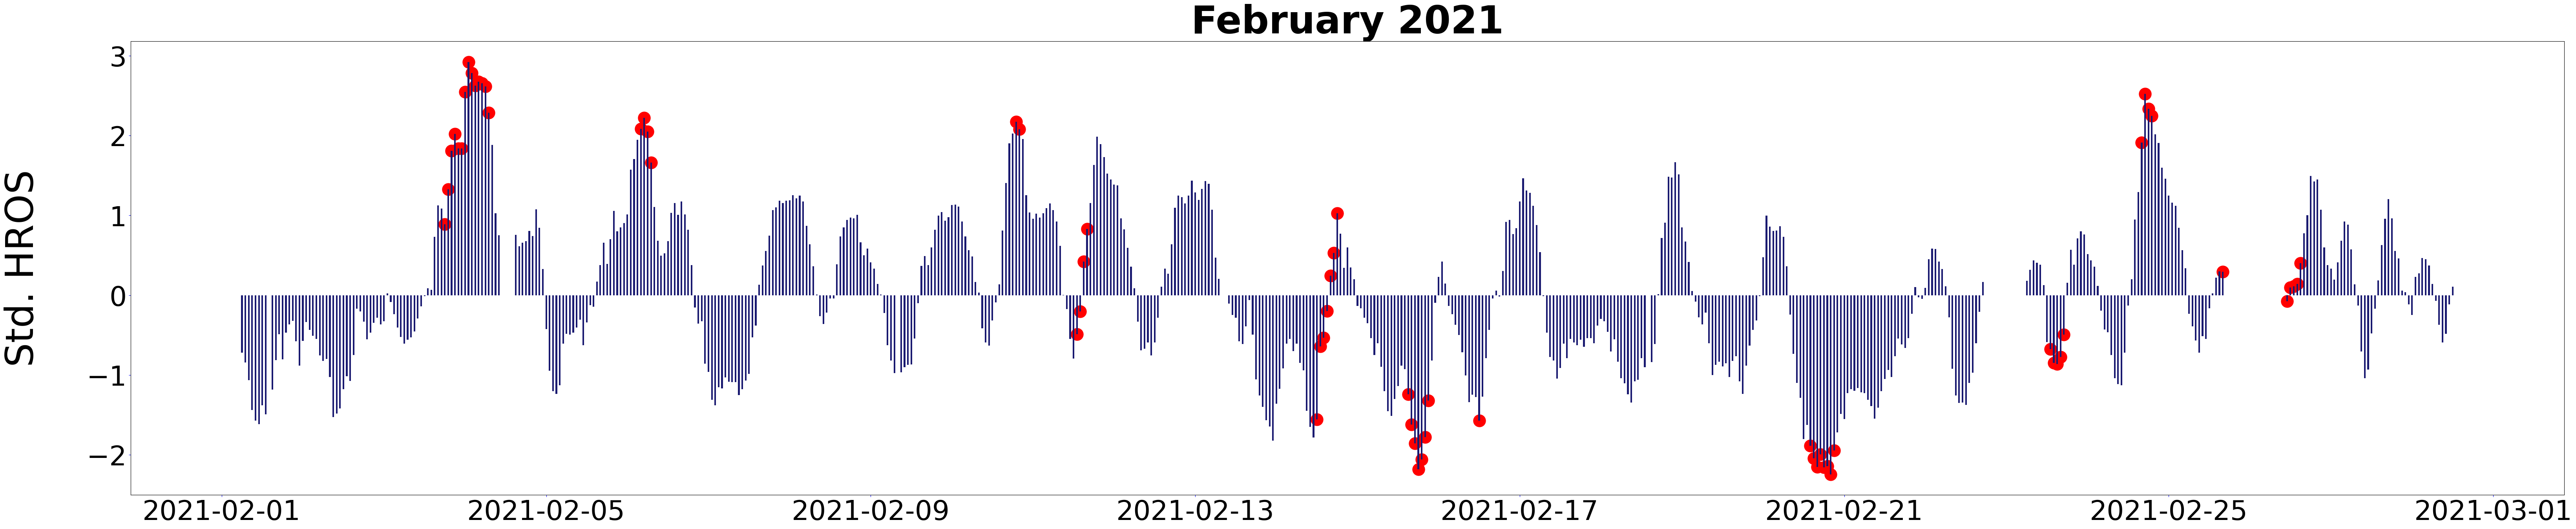

In [451]:
plt.rcdefaults()

fig, ax = plt.subplots(1, figsize=(80,15))
ah = hros_data.loc[hros_data['anomaly'] == -1, ('Time', 'HeartRate')] #anomaly
bh = ah[(ah['HeartRate'] > 0)]
ax.bar(hros_data['Time'], hros_data['HeartRate'], linestyle='-',color='midnightblue' ,lw=6, width=0.02)
ax.scatter(ah['Time'],ah['HeartRate'], color='red', label='Anomaly', s=500) #I've used ah instead of bh

ax.tick_params(axis='both', which='major', color='blue', labelsize=50)
ax.tick_params(axis='both', which='minor', color='blue', labelsize=50)
ax.set_title('February 2021',fontweight="bold", size=70) # Title
ax.set_ylabel('Std. HROS\n', fontsize = 70) 

plt.plot()
plt.savefig('HROS.jpg', dpi=300, bbox_inches='tight')

In [ ]:
#can increase readability and resuability of code by defining functions instead of writing the 'almost' same code again and again

In [283]:
#resting heart rate data is in df_feb_data which will be used as input to the LSTM model

df_feb_data

,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Sleep Type,Steps_window_12
Time,,,,,,,
2021-02-01 00:11:00,86.444444,0,1.30310,0,NaN,NaN,0.0
2021-02-01 00:12:00,82.666667,0,1.30310,0,NaN,NaN,0.0
2021-02-01 00:13:00,79.888889,0,1.30310,0,NaN,NaN,0.0
2021-02-01 00:14:00,78.500000,0,1.30310,0,NaN,NaN,0.0
2021-02-01 00:15:00,76.666667,0,1.30310,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...
2021-02-28 12:51:00,96.636364,0,1.56372,0,NaN,NaN,0.0
2021-02-28 12:52:00,95.900000,0,1.69403,0,NaN,NaN,0.0
2021-02-28 12:53:00,96.222222,0,1.69403,0,NaN,NaN,0.0


In [284]:
df_lstm=df_feb_data.drop(['Calories Burnt','Elevation (m)','Minutes Asleep','Sleep Type','Steps_window_12'],axis=1)

# smooth data
df_lstm_nonas = df_lstm.dropna()
df_lstm_rom = df_lstm_nonas.rolling(400).mean()
# resample
df_lstm_resmp = df_lstm_rom.resample('1H').mean()
df_lstm2 = df_lstm_resmp.drop(['Steps'], axis=1)
df_lstm2 = df_lstm2.rename(columns={"HeartRate": "RHR"})
df_lstm2 = df_lstm2.dropna()

df_lstm2

,RHR
Time,
2021-02-01 12:00:00,74.591902
2021-02-01 13:00:00,75.065525
2021-02-01 15:00:00,75.529348
2021-02-01 16:00:00,76.726364
2021-02-01 17:00:00,77.811127
...,...
2021-02-28 08:00:00,77.947940
2021-02-28 09:00:00,77.266460
2021-02-28 10:00:00,77.526292


In [ ]:
#Ask For LSTM: if you can just randomly split the data for training and testing, should I apply all the 7 data augmentation methods
#Do you expect me to get the patterns of heart rate, steps, sleep and elevation per day? because I've seen the same in your presentation that day
#Or should I just summarize the entire data

In [287]:
df_feb_alldata['dayofweek']=df_feb_alldata.index.strftime("%A")
df_feb_alldata.head()


,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Sleep Type,filename,dayofweek
Time,,,,,,,,
2021-02-01 00:00:00,73.333333,0,1.30310,0,NaN,NaN,NaN,Monday
2021-02-01 00:01:00,73.444444,0,1.30310,0,NaN,NaN,NaN,Monday
2021-02-01 00:02:00,73.200000,0,1.43341,0,NaN,NaN,NaN,Monday
2021-02-01 00:03:00,73.714286,0,1.30310,0,NaN,NaN,NaN,Monday
2021-02-01 00:04:00,74.625000,0,1.30310,0,NaN,NaN,NaN,Monday


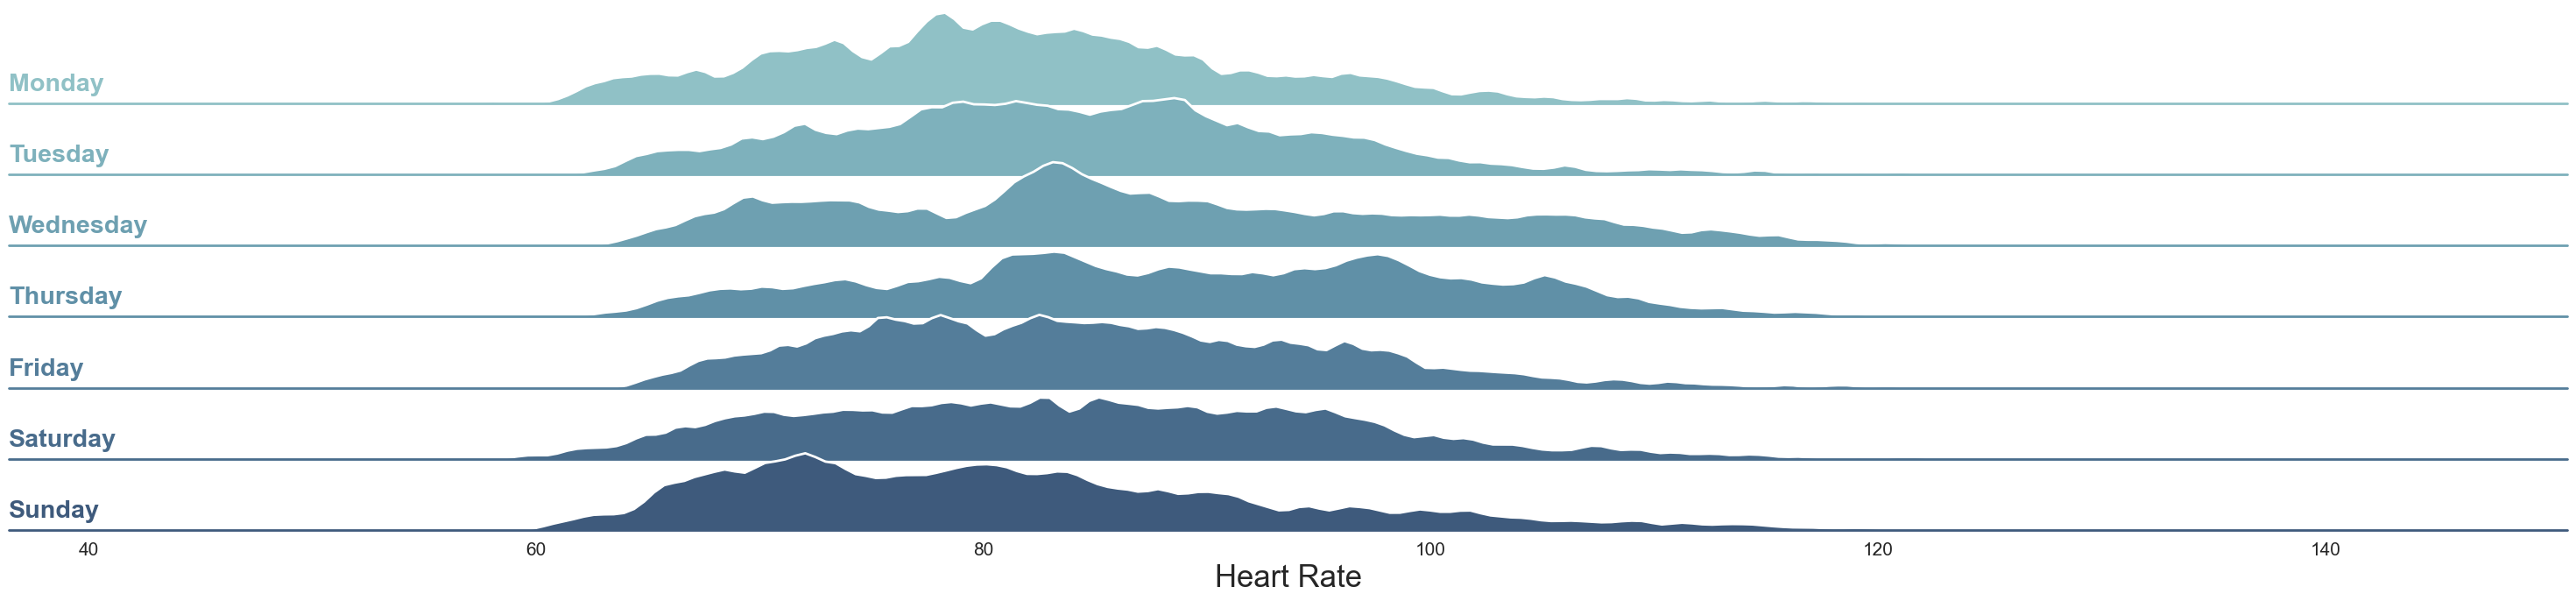

In [452]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
x = default_index['HeartRate']
g = default_index['dayofweek']

df_trial = pd.DataFrame(dict(x=x, g=g))

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df_trial, row="g", hue="g", aspect=30, height=1, palette=pal)#aspect=15,height=0.5

g.map(sns.kdeplot, 'x',clip_on=False,bw_adjust=0.2,
      fill=True, alpha=1, linewidth=0.3)#kdeplot: bw_adjust=0.1,
g.map(sns.kdeplot, 'x' , clip_on=False, color="w", lw=2 ,bw_adjust=0.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,fontsize='xx-large',
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'x')

g.fig.subplots_adjust(hspace=-.25)


g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

g.set_axis_labels("Heart Rate", "", fontsize=25)
plt.xticks(fontsize=15)

plt.plot()
plt.savefig('kde_weekday.jpg', dpi=300, bbox_inches='tight')


In [592]:
print('Number of missing values in each column')
df_feb_alldata.isnull().sum()

Number of missing values in each column


HeartRate          1205
Steps                 0
Calories Burnt        0
Elevation (m)         0
Minutes Asleep    37434
Sleep Type        37434
filename          37434
dayofweek             0
dtype: int64

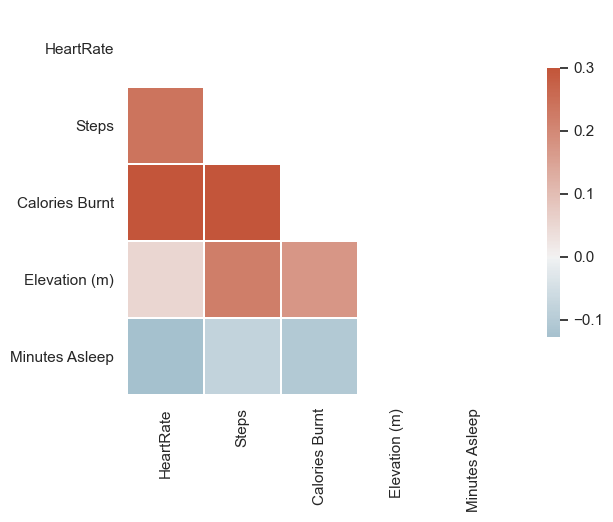

In [453]:
d=df_feb_alldata.drop(['filename'],axis=1)
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .7})
plt.plot()
plt.savefig('Heatmap.jpg', dpi=300, bbox_inches='tight')

In [416]:
d_pair=df_feb_alldata.drop(['filename'],axis=1)
d_pair['Weekday']=df_feb_alldata['filename']
for i in range(0,37710):
    if d_pair['dayofweek'][i]=='Sunday' or d_pair['dayofweek'][i]=='Saturday':
        d_pair['Weekday'][i]='No'
    else:
        d_pair['Weekday'][i]='Yes'

d_pair.drop(['Elevation (m)'],axis=1,inplace=True)
d_pair

<ipython-input-416-146dda461ae3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_pair['Weekday'][i]='Yes'
<ipython-input-416-146dda461ae3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_pair['Weekday'][i]='No'


,HeartRate,Steps,Calories Burnt,Minutes Asleep,Sleep Type,dayofweek,Weekday
Time,,,,,,,
2021-02-01 00:00:00,73.333333,0,1.30310,NaN,NaN,Monday,Yes
2021-02-01 00:01:00,73.444444,0,1.30310,NaN,NaN,Monday,Yes
2021-02-01 00:02:00,73.200000,0,1.43341,NaN,NaN,Monday,Yes
2021-02-01 00:03:00,73.714286,0,1.30310,NaN,NaN,Monday,Yes
2021-02-01 00:04:00,74.625000,0,1.30310,NaN,NaN,Monday,Yes
...,...,...,...,...,...,...,...
2021-02-28 12:51:00,96.636364,0,1.56372,NaN,NaN,Sunday,No
2021-02-28 12:52:00,95.900000,0,1.69403,NaN,NaN,Sunday,No
2021-02-28 12:53:00,96.222222,0,1.69403,NaN,NaN,Sunday,No


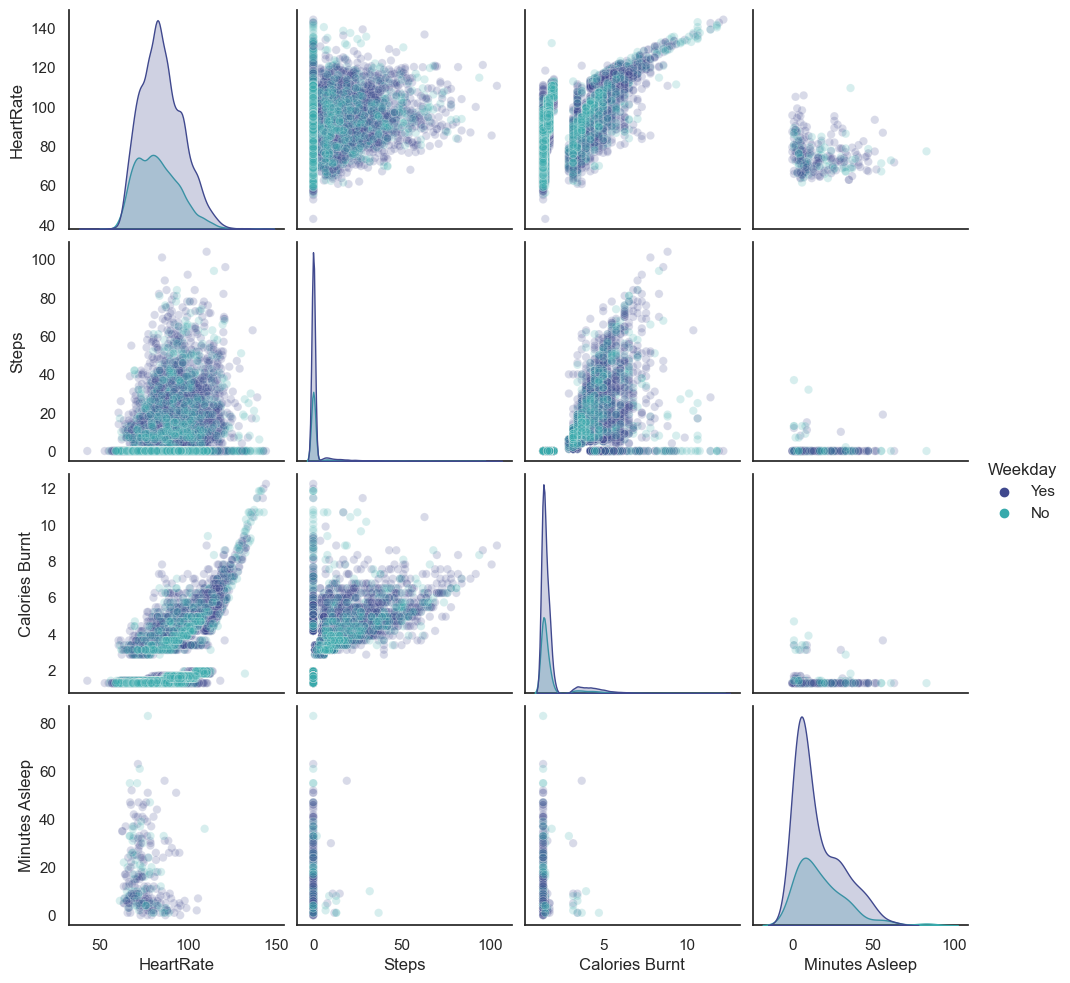

In [454]:
sns.pairplot(d_pair, hue="Weekday",dropna=True,plot_kws={'alpha': 0.2},palette="mako")
plt.plot()
plt.savefig('pairplot.jpg', dpi=300, bbox_inches='tight')

In [ ]:
#LSTM

In [458]:
df_feb_data.describe() #contains RHR values

,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Steps_window_12
count,20362.000000,21461.0,21461.000000,21461.0,179.000000,21461.0
mean,80.890539,0.0,1.408564,0.0,16.268156,0.0
std,10.424235,0.0,0.352552,0.0,14.057492,0.0
min,43.000000,0.0,1.303100,0.0,0.000000,0.0
25%,72.833333,0.0,1.303100,0.0,5.000000,0.0
50%,80.000000,0.0,1.303100,0.0,11.000000,0.0
75%,87.285714,0.0,1.433410,0.0,24.500000,0.0
max,144.454545,0.0,12.249140,0.0,83.000000,0.0


In [470]:
df_lstm=df_feb_data.drop(['Calories Burnt','Elevation (m)','Minutes Asleep','Sleep Type','Steps_window_12'],axis=1)

# smooth data
df_lstm_nonas = df_lstm.dropna()
df_lstm_rom = df_lstm_nonas.rolling(400).mean()
# resample
df_lstm_resmp = df_lstm_rom.resample('1H').mean()
df_lstm2 = df_lstm_resmp.drop(['Steps'], axis=1)
df_lstm2 = df_lstm2.rename(columns={"HeartRate": "RHR"})
df_lstm2 = df_lstm2.dropna()

df_lstm2

,RHR
Time,
2021-02-01 12:00:00,74.591902
2021-02-01 13:00:00,75.065525
2021-02-01 15:00:00,75.529348
2021-02-01 16:00:00,76.726364
2021-02-01 17:00:00,77.811127
...,...
2021-02-28 08:00:00,77.947940
2021-02-28 09:00:00,77.266460
2021-02-28 10:00:00,77.526292


In [471]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_lstm2, test_size=0.25, random_state=42)

print(train)
print(test)

                           RHR
Time                          
2021-02-28 06:00:00  81.736469
2021-02-24 21:00:00  91.942535
2021-02-16 17:00:00  79.923350
2021-02-15 20:00:00  75.495450
2021-02-25 00:00:00  95.085500
...                        ...
2021-02-04 16:00:00  91.996637
2021-02-06 06:00:00  88.423750
2021-02-13 03:00:00  86.144839
2021-02-20 08:00:00  76.955308
2021-02-06 02:00:00  91.091540

[449 rows x 1 columns]
                           RHR
Time                          
2021-02-06 10:00:00  81.727705
2021-02-19 14:00:00  73.840821
2021-02-27 02:00:00  83.813414
2021-02-04 23:00:00  91.900737
2021-02-09 10:00:00  75.107781
...                        ...
2021-02-06 17:00:00  85.253253
2021-02-17 23:00:00  82.765703
2021-02-19 00:00:00  89.064418
2021-02-02 22:00:00  80.483508
2021-02-01 12:00:00  74.591902

[150 rows x 1 columns]


In [472]:
scaler = StandardScaler()
train[['RHR']] = scaler.fit_transform(train[['RHR']])
test[['RHR']] = scaler.transform(test[['RHR']])

print(train)
print(test)

                          RHR
Time                         
2021-02-28 06:00:00  0.270587
2021-02-24 21:00:00  2.003322
2021-02-16 17:00:00 -0.037235
2021-02-15 20:00:00 -0.788982
2021-02-25 00:00:00  2.536919
...                       ...
2021-02-04 16:00:00  2.012507
2021-02-06 06:00:00  1.405920
2021-02-13 03:00:00  1.019018
2021-02-20 08:00:00 -0.541134
2021-02-06 02:00:00  1.858845

[449 rows x 1 columns]
                          RHR
Time                         
2021-02-06 10:00:00  0.269099
2021-02-19 14:00:00 -1.069896
2021-02-27 02:00:00  0.623201
2021-02-04 23:00:00  1.996226
2021-02-09 10:00:00 -0.854798
...                       ...
2021-02-06 17:00:00  0.867649
2021-02-17 23:00:00  0.445326
2021-02-19 00:00:00  1.514690
2021-02-02 22:00:00  0.057866
2021-02-01 12:00:00 -0.942382

[150 rows x 1 columns]


<ipython-input-472-4f70a5ef2a14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['RHR']] = scaler.fit_transform(train[['RHR']])
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [491]:
def augmentation(self, dataset=train_dataset):

        def scaling(dataset, sigma=0.1):
            factor = np.random.normal(loc=1., scale=sigma, size=(dataset.shape[0],dataset.shape[2]))
            data_scaled = np.multiply(dataset, factor[:,np.newaxis,:])
            return data_scaled

        def rotation(dataset):
            flip = np.random.choice([-1, 1], size=(dataset.shape[0],dataset.shape[2]))
            rotate_axis = np.arange(dataset.shape[2])
            np.random.shuffle(rotate_axis) 
            data_rotation = flip[:,np.newaxis,:] * dataset[:,:,rotate_axis]   
            return data_rotation

        def permutation(dataset, max_segments=5, seg_mode="equal"):
            orig_steps = np.arange(dataset.shape[1])
            num_segs = np.random.randint(1, max_segments, size=(dataset.shape[0]))
            data_permute = np.zeros_like(dataset)
            for i, pat in enumerate(dataset):
                if num_segs[i] > 1:
                    if seg_mode == "random":
                        split_points = np.random.choice(dataset.shape[1]-2, num_segs[i]-1, replace=False)
                        split_points.sort()
                        splits = np.split(orig_steps, split_points)
                    else:
                        splits = np.array_split(orig_steps, num_segs[i])
                    warp = np.concatenate(np.random.permutation(splits)).ravel()
                    data_permute[i] = pat[warp]
                else:
                    data_permute[i] = pat
            return data_permute

        def magnitude_warp(dataset, sigma=0.2, knot=4):
            from scipy.interpolate import CubicSpline
            orig_steps = np.arange(dataset.shape[1])
            random_warps = np.random.normal(loc=1.0, scale=sigma, size=(dataset.shape[0], knot+2, dataset.shape[2]))
            warp_steps = (np.ones((dataset.shape[2],1))*(np.linspace(0, dataset.shape[1]-1., num=knot+2))).T
            data_m_Warp = np.zeros_like(dataset)
            for i, pat in enumerate(dataset):
                warper = np.array([CubicSpline(warp_steps[:,dim], random_warps[i,:,dim])(orig_steps) for dim in range(dataset.shape[2])]).T
                data_m_Warp[i] = pat * warper
            return data_m_Warp

        def time_warp(dataset, sigma=0.2, knot=4):
            from scipy.interpolate import CubicSpline
            orig_steps = np.arange(dataset.shape[1])
            random_warps = np.random.normal(loc=1.0, scale=sigma, size=(dataset.shape[0], knot+2, dataset.shape[2]))
            warp_steps = (np.ones((dataset.shape[2],1))*(np.linspace(0, dataset.shape[1]-1., num=knot+2))).T
            data_t_Warp = np.zeros_like(dataset)
            for i, pat in enumerate(dataset):
                for dim in range(dataset.shape[2]):
                    time_warp = CubicSpline(warp_steps[:,dim], warp_steps[:,dim] * random_warps[i,:,dim])(orig_steps)
                    scale = (dataset.shape[1]-1)/time_warp[-1]
                    data_t_Warp[i,:,dim] = np.interp(orig_steps, np.clip(scale*time_warp, 0, dataset.shape[1]-1), pat[:,dim]).T
            return data_t_Warp

        def window_slice(dataset, reduce_ratio=0.9):
            target_len = np.ceil(reduce_ratio*dataset.shape[1]).astype(int)
            if target_len >= dataset.shape[1]:
                return dataset
            starts = np.random.randint(low=0, high=dataset.shape[1]-target_len, size=(dataset.shape[0])).astype(int)
            ends = (target_len + starts).astype(int)
            data_w_Slice = np.zeros_like(dataset)
            for i, pat in enumerate(dataset):
                for dim in range(dataset.shape[2]):
                    data_w_Slice[i,:,dim] = np.interp(np.linspace(0, target_len, num=dataset.shape[1]), np.arange(target_len), pat[starts[i]:ends[i],dim]).T
            return data_w_Slice

        def window_warp(dataset, window_ratio=0.1, scales=[0.5, 2.]):
            warp_scales = np.random.choice(scales, dataset.shape[0])
            warp_size = np.ceil(window_ratio*dataset.shape[1]).astype(int)
            window_steps = np.arange(warp_size)
            window_starts = np.random.randint(low=1, high=dataset.shape[1]-warp_size-1, size=(dataset.shape[0])).astype(int)
            window_ends = (window_starts + warp_size).astype(int)
            data_w_Warp = np.zeros_like(dataset)
            for i, pat in enumerate(dataset):
                for dim in range(dataset.shape[2]):
                    start_seg = pat[:window_starts[i],dim]
                    window_seg = np.interp(np.linspace(0, warp_size-1, num=int(warp_size*warp_scales[i])), window_steps, pat[window_starts[i]:window_ends[i],dim])
                    end_seg = pat[window_ends[i]:,dim]
                    warped = np.concatenate((start_seg, window_seg, end_seg))                
                    data_w_Warp[i,:,dim] = np.interp(np.arange(dataset.shape[1]), np.linspace(0, dataset.shape[1]-1., num=warped.size), warped).T
            return data_w_Warp

        data_scaled = scaling(dataset)
        data_rotation = rotation(dataset)
        data_permute = permutation(dataset)
        data_m_Warp = magnitude_warp(dataset)
        data_t_Warp = time_warp(dataset)
        data_w_Slice = window_slice(dataset)
        data_w_Warp = window_warp(dataset)

        augment_dataset = np.concatenate([dataset, data_scaled, data_rotation, data_permute, data_m_Warp, data_t_Warp, data_w_Slice, data_w_Warp])

        return augment_dataset


In [484]:
Xs = []
for i in range(len(train[['RHR']]) - 8):
    v = train[['RHR']].iloc[i:(i + 8)].values
    Xs.append(v)
train_dataset=np.array(Xs)

#train_dataset= create_dataset(train[['RHR']],8)
#test_dataset= create_dataset(test[['RHR']],8)

Xs = []
for i in range(len(test[['RHR']]) - 8):
    v = test[['RHR']].iloc[i:(i + 8)].values
    Xs.append(v)
test_dataset=np.array(Xs)

train_dataset

array([[[ 0.27058732],
        [ 2.00332222],
        [-0.03723506],
        ...,
        [ 1.78652073],
        [-0.87860232],
        [-0.88988103]],

       [[ 2.00332222],
        [-0.03723506],
        [-0.78898175],
        ...,
        [-0.87860232],
        [-0.88988103],
        [ 0.80623896]],

       [[-0.03723506],
        [-0.78898175],
        [ 2.53691901],
        ...,
        [-0.88988103],
        [ 0.80623896],
        [-0.58973299]],

       ...,

       [[-1.96273115],
        [-1.36326421],
        [ 0.9037391 ],
        ...,
        [-1.04117973],
        [ 2.01250738],
        [ 1.40592041]],

       [[-1.36326421],
        [ 0.9037391 ],
        [-1.20342908],
        ...,
        [ 2.01250738],
        [ 1.40592041],
        [ 1.01901833]],

       [[ 0.9037391 ],
        [-1.20342908],
        [ 0.8741849 ],
        ...,
        [ 1.40592041],
        [ 1.01901833],
        [-0.54113439]]])

In [492]:
# data augmentation of trainign dataset
train_aug_dataset = augmentation(train_dataset)
train_aug_dataset

C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


array([[[ 0.27058732],
        [ 2.00332222],
        [-0.03723506],
        ...,
        [ 1.78652073],
        [-0.87860232],
        [-0.88988103]],

       [[ 2.00332222],
        [-0.03723506],
        [-0.78898175],
        ...,
        [-0.87860232],
        [-0.88988103],
        [ 0.80623896]],

       [[-0.03723506],
        [-0.78898175],
        [ 2.53691901],
        ...,
        [-0.88988103],
        [ 0.80623896],
        [-0.58973299]],

       ...,

       [[-1.96273115],
        [-1.03940659],
        [ 0.9037391 ],
        ...,
        [-0.49393269],
        [ 1.57626636],
        [ 1.40592041]],

       [[-1.36326421],
        [ 0.9037391 ],
        [ 0.30169105],
        ...,
        [ 1.14002535],
        [ 1.49257569],
        [ 1.01901833]],

       [[ 0.9037391 ],
        [-0.90662709],
        [ 0.32693786],
        ...,
        [ 1.57923097],
        [ 1.07429005],
        [-0.54113439]]])

In [494]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=f9ac4580e6d496ae0afeead0cdfd118184928401a8af6d204a873956a8fff93d
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=90521e9ceae03bd9fe04882fff15e8644f7893da62885fc9824824fe7e856800
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [495]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, load_model, save_model

In [496]:
model = keras.Sequential()
# shape [batch, time, features] => [batch, time, lstm_units]
model.add(keras.layers.LSTM(units=128, input_shape=(train_dataset.shape[1], train_dataset.shape[2]), return_sequences=True))
#model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.LSTM(units=64, return_sequences=False))
model.add(keras.layers.RepeatVector(n=train_dataset.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.LSTM(units=128, return_sequences=True))
        
# shape => [batch, time, features]
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=train_dataset.shape[2])))
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(lr = 0.0001),metrics=[tf.metrics.MeanSquaredError()])
history = model.fit(train_aug_dataset, train_aug_dataset, batch_size=64,epochs=1200,validation_split=0.05, shuffle=False)

"""
Shifted neeche
predictions = model.predict(train_dataset)
losses = np.mean(np.abs(predictions - train_dataset), axis=1)

stats = pd.DataFrame(losses).describe()
print(stats)
mean = stats.filter(like='mean', axis=0)
mean = float(mean[0]) 
std = stats.filter(like='std', axis=0)
std = float(std[0]) 
max = stats.filter(like='max', axis=0)
max = float(max[0])
        
        #THRESHOLD = max
        # We can calculate the mean and standard deviation of training data loss 
        # then calculate the cut-off as more than 2 standard deviations from the mean.
        # We can then identify anomalies as those examples that fall outside of the defined upper limit.
        #cut_off = std * 3
        #THRESHOLD =  mean + cut_off
THRESHOLD =  max 

"""



C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/1200
53/53 [==============================] - 10s 71ms/step - loss: 0.9126 - mean_squared_error: 0.9126 - val_loss: 0.7974 - val_mean_squared_error: 0.7974
Epoch 2/1200
53/53 [==============================] - 2s 38ms/step - loss: 0.8558 - mean_squared_error: 0.8558 - val_loss: 0.7212 - val_mean_squared_error: 0.7212
Epoch 3/1200
53/53 [==============================] - 2s 39ms/step - loss: 0.8059 - mean_squared_error: 0.8059 - val_loss: 0.6697 - val_mean_squared_error: 0.6697
Epoch 4/1200
53/53 [==============================] - 2s 38ms/step - loss: 0.7634 - mean_squared_error: 0.7634 - val_loss: 0.6141 - val_mean_squared_error: 0.6141
Epoch 5/1200
53/53 [==============================] - 2s 38ms/step - loss: 0.7431 - mean_squared_error: 0.7431 - val_loss: 0.6004 - val_mean_squared_error: 0.6004
Epoch 6/1200
53/53 [==============================] - 2s 40ms/step - loss: 0.7329 - mean_squared_error: 0.7329 - val_loss: 0.5887 - val_mean_squared_error: 0.5887
Epoch 7/1200
53/53 [=

[]

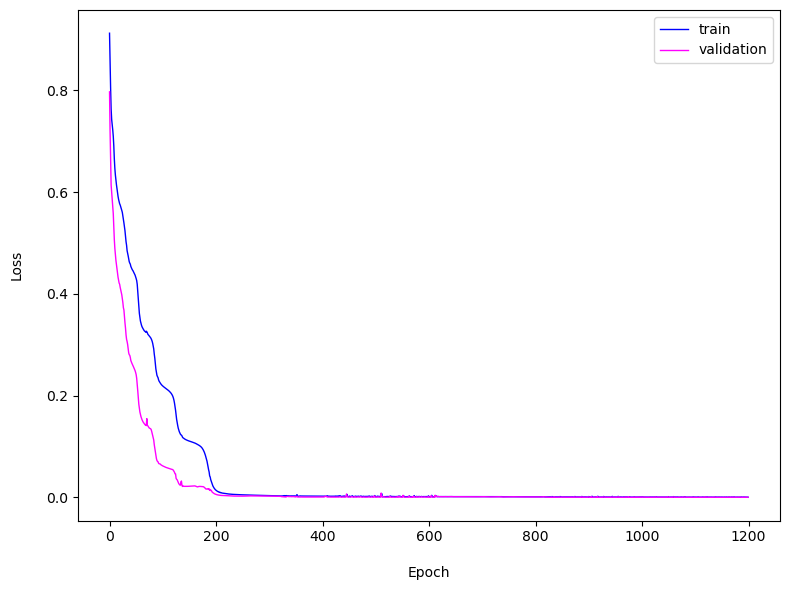

In [569]:
#history = pd.DataFrame(history.history) #uncomment if you run again after calculating history in the previous cell
fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(history['loss'], lw=1, c='blue')
ax.plot(history['val_loss'], lw=1, c='magenta')
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['train', 'validation'],facecolor="white")
plt.title('')
plt.tight_layout()
plt.plot()
#plt.savefig('loss_mse.jpg', dpi=300, bbox_inches='tight')

In [504]:
all_merged = pd.concat([train, test])
print(all_merged)

                          RHR
Time                         
2021-02-28 06:00:00  0.270587
2021-02-24 21:00:00  2.003322
2021-02-16 17:00:00 -0.037235
2021-02-15 20:00:00 -0.788982
2021-02-25 00:00:00  2.536919
...                       ...
2021-02-06 17:00:00  0.867649
2021-02-17 23:00:00  0.445326
2021-02-19 00:00:00  1.514690
2021-02-02 22:00:00  0.057866
2021-02-01 12:00:00 -0.942382

[599 rows x 1 columns]


In [505]:
Xs = []
for i in range(len(all_merged[['RHR']]) - 8):
    v = all_merged[['RHR']].iloc[i:(i + 8)].values
    Xs.append(v)
all_merged_dataset=np.array(Xs)
all_merged_dataset

array([[[ 0.27058732],
        [ 2.00332222],
        [-0.03723506],
        ...,
        [ 1.78652073],
        [-0.87860232],
        [-0.88988103]],

       [[ 2.00332222],
        [-0.03723506],
        [-0.78898175],
        ...,
        [-0.87860232],
        [-0.88988103],
        [ 0.80623896]],

       [[-0.03723506],
        [-0.78898175],
        [ 2.53691901],
        ...,
        [-0.88988103],
        [ 0.80623896],
        [-0.58973299]],

       ...,

       [[ 2.01729222],
        [-1.15458879],
        [-0.76673729],
        ...,
        [-0.13627385],
        [ 0.8676493 ],
        [ 0.44532555]],

       [[-1.15458879],
        [-0.76673729],
        [-0.17116489],
        ...,
        [ 0.8676493 ],
        [ 0.44532555],
        [ 1.51468985]],

       [[-0.76673729],
        [-0.17116489],
        [-0.61618575],
        ...,
        [ 0.44532555],
        [ 1.51468985],
        [ 0.05786583]]])

In [ ]:
stats = pd.DataFrame(losses).describe()
print(stats)
mean = stats.filter(like='mean', axis=0)
mean = float(mean[0]) 
std = stats.filter(like='std', axis=0)
std = float(std[0]) 
max = stats.filter(like='max', axis=0)
max = float(max[0])
        
        #THRESHOLD = max
        # We can calculate the mean and standard deviation of training data loss 
        # then calculate the cut-off as more than 2 standard deviations from the mean.
        # We can then identify anomalies as those examples that fall outside of the defined upper limit.
        #cut_off = std * 3
        #THRESHOLD =  mean + cut_off
THRESHOLD =  max

In [508]:
predictions = model.predict(train_dataset)
losses = np.mean(np.abs(predictions - train_dataset), axis=1)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

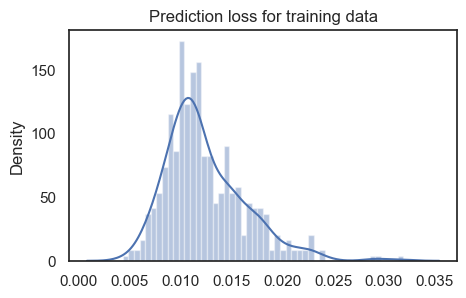

In [576]:
sns.set_theme(style='white')
plt.figure(figsize=(5,3))
figure = sns.distplot(losses, bins=50, kde=True,hist=True).set_title('Prediction loss for training data')
plt.savefig('loss_training data.jpg', dpi=300, bbox_inches='tight')
plt.plot()

In [514]:
predictions_test = model.predict(test_dataset)
losses_test = np.mean(np.abs(predictions_test - test_dataset), axis=1)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

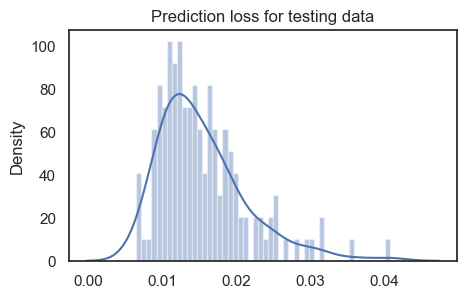

In [577]:
plt.figure(figsize=(5,3))
figure = sns.distplot(losses_test, bins=50, kde=True).set_title('Prediction loss for testing data')
#plt.savefig(myphd_id+"_predictions_loss_train.pdf")
plt.savefig('loss_testing data.jpg', dpi=300, bbox_inches='tight')
plt.plot()

In [517]:
test_score_df = pd.DataFrame(index=test[8:].index)
test_score_df['loss'] = losses_test
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['RHR'] = test[8:].RHR
anomalies = test_score_df[test_score_df.anomaly == True]

print(anomalies)

                         loss  threshold  anomaly       RHR
Time                                                       
2021-02-28 04:00:00  0.035928   0.031916     True  1.024848
2021-02-25 14:00:00  0.040815   0.031916     True -0.288692


In [518]:
predictions_all = model.predict(all_merged_dataset)
losses_all = np.mean(np.abs(predictions_all - all_merged_dataset), axis=1)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,loss,threshold,anomaly,RHR
datetime,,,,
2021-02-01 12:00:00,0.009722,0.031916,False,-0.942382
2021-02-01 13:00:00,0.010210,0.031916,False,-0.861972
2021-02-01 15:00:00,0.012313,0.031916,False,-0.783227
2021-02-01 16:00:00,0.010337,0.031916,False,-0.580003
2021-02-01 17:00:00,0.012462,0.031916,False,-0.395838
...,...,...,...,...
2021-02-28 08:00:00,0.014386,0.031916,False,-0.372610
2021-02-28 09:00:00,0.015044,0.031916,False,-0.488308
2021-02-28 10:00:00,0.016698,0.031916,False,-0.444196


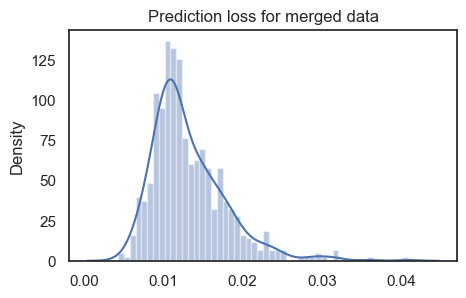

In [578]:
plt.figure(figsize=(5,3))
sns.distplot(losses_all, bins=50, kde=True).set_title('Prediction loss for merged data')
plt.savefig('loss_all data.jpg', dpi=300, bbox_inches='tight')
anomalies = sum(l < THRESHOLD for l in losses_all)

all_score_df = pd.DataFrame(index=all_merged[8:].index)
all_score_df['loss'] = losses_all
all_score_df['threshold'] = THRESHOLD
all_score_df['anomaly'] = all_score_df.loss > all_score_df.threshold
all_score_df['RHR'] = all_merged[8:].RHR
all_anomalies = all_score_df
        
all_anomalies.index = all_anomalies.index.rename('datetime')
all_anomalies = all_anomalies.sort_index()

all_anomalies

#all_anomalies.to_csv(myphd_id + '_anomalies_all.csv')

In [520]:
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter

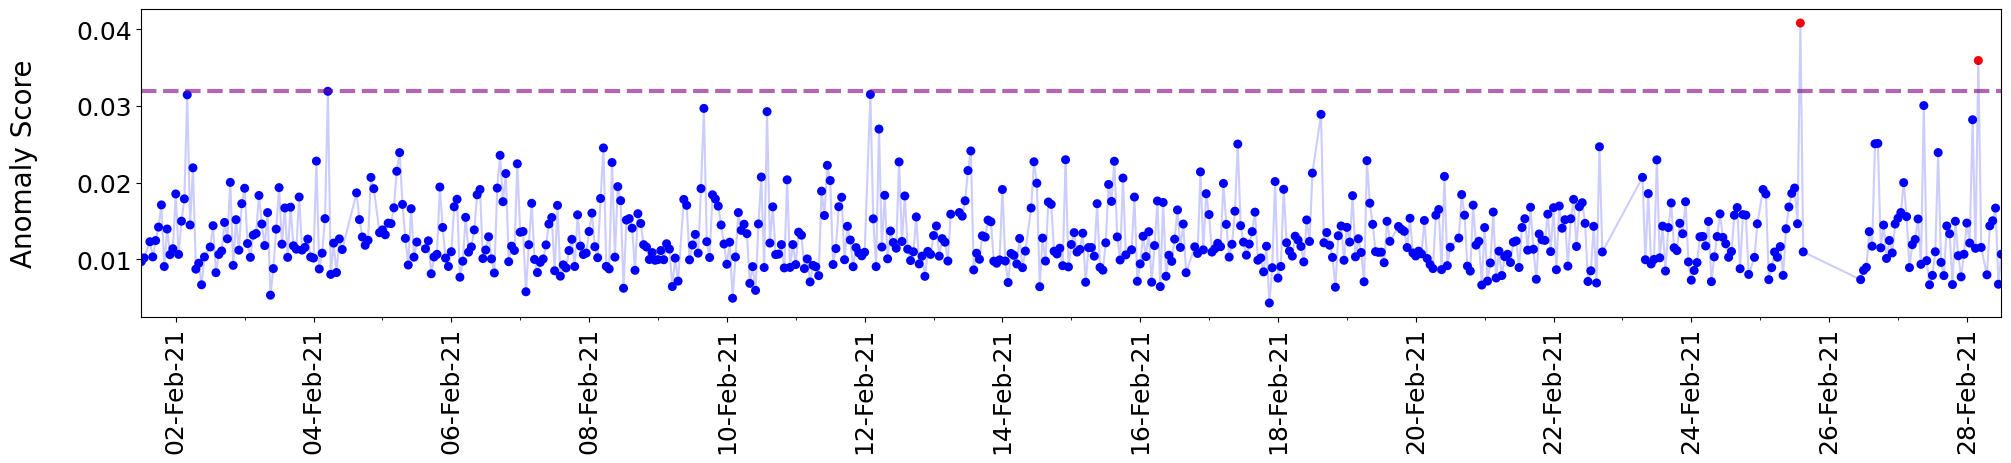

In [579]:
        plt.rcdefaults()

        # plot anomaly scores
        
        all_score_df1 = all_anomalies.reset_index()
        
        ax3 = all_score_df1.plot.scatter(x='datetime',y='loss', figsize=(24,4),  rot=90, marker='o', lw=2,
            c=['red' if i== True else 'blue'  for i in all_score_df1['anomaly']])
        
        ax3.plot(all_score_df1[['datetime']] ,all_score_df1[['loss']], color="blue",alpha=0.2)
        
        ax3.set_xlim(all_score_df1['datetime'].iloc[0], all_score_df1['datetime'].iloc[-1]) 
        ax3.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
        ax3.xaxis.set_major_locator(mdates.DayLocator(interval=2))
        ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
        ax3.set_ylabel('Anomaly Score\n', fontsize = 20) # Y label
        ax3.set_xlabel('', fontsize = 0) # X label
        
        ax3.tick_params(axis='both', which='major', labelsize=18)
        ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        #ax3.set_title('Feb'+ '\n', fontweight="bold", size=30) # Title
        
        plt.axhline(y=THRESHOLD, color='purple', linestyle='--', lw=3, alpha=0.6)
        
        plt.tick_params(axis='both',which='both',bottom=True, top=False, labelbottom=True) 
        #plt.title(myphd_id + '\n\n', fontweight="bold", size=30) # Sub title
        #plt.tight_layout()
        #plt.savefig(myphd_id + '_all_anomaly_scores.pdf', bbox_inches='tight') 
        plt.savefig('LSTM.jpg', dpi=300, bbox_inches='tight')
        plt.show()

In [607]:
df_feb_alldata

,HeartRate,Steps,Calories Burnt,Elevation (m),Minutes Asleep,Sleep Type,filename,dayofweek
Time,,,,,,,,
2021-02-01 00:00:00,73.333333,0,1.30310,0,NaN,NaN,NaN,Monday
2021-02-01 00:01:00,73.444444,0,1.30310,0,NaN,NaN,NaN,Monday
2021-02-01 00:02:00,73.200000,0,1.43341,0,NaN,NaN,NaN,Monday
2021-02-01 00:03:00,73.714286,0,1.30310,0,NaN,NaN,NaN,Monday
2021-02-01 00:04:00,74.625000,0,1.30310,0,NaN,NaN,NaN,Monday
...,...,...,...,...,...,...,...,...
2021-02-28 12:51:00,96.636364,0,1.56372,0,NaN,NaN,NaN,Sunday
2021-02-28 12:52:00,95.900000,0,1.69403,0,NaN,NaN,NaN,Sunday
2021-02-28 12:53:00,96.222222,0,1.69403,0,NaN,NaN,NaN,Sunday


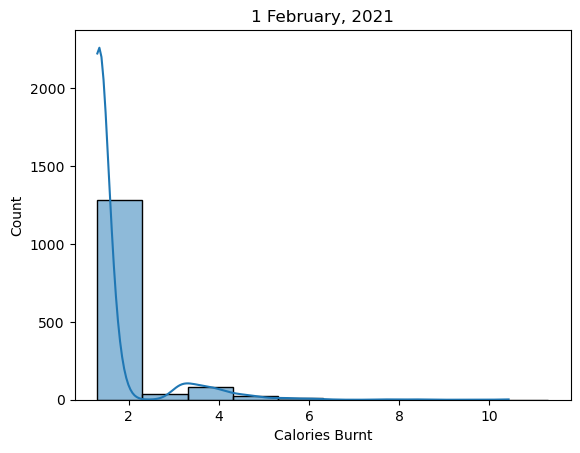

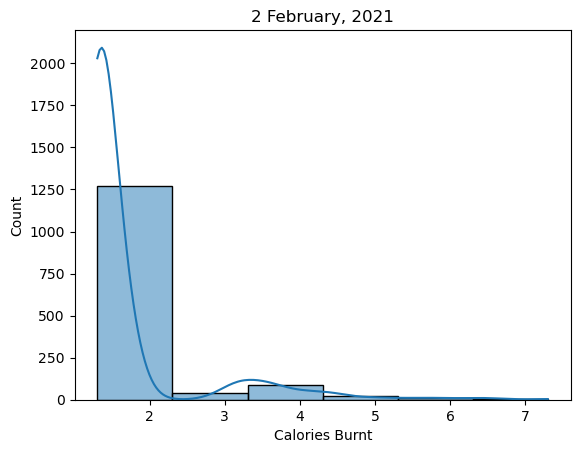

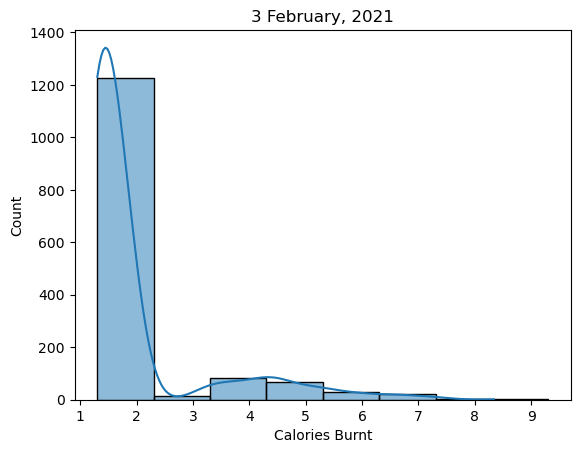

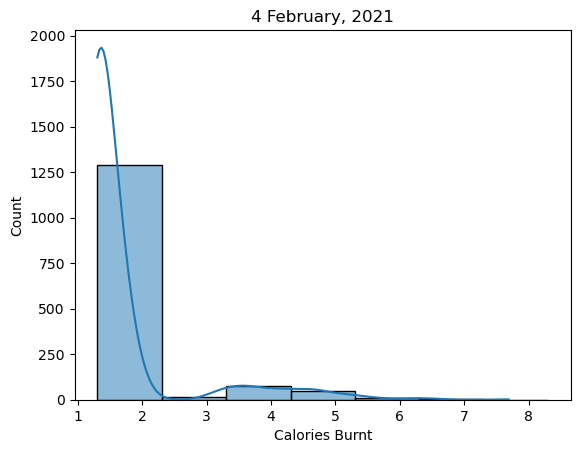

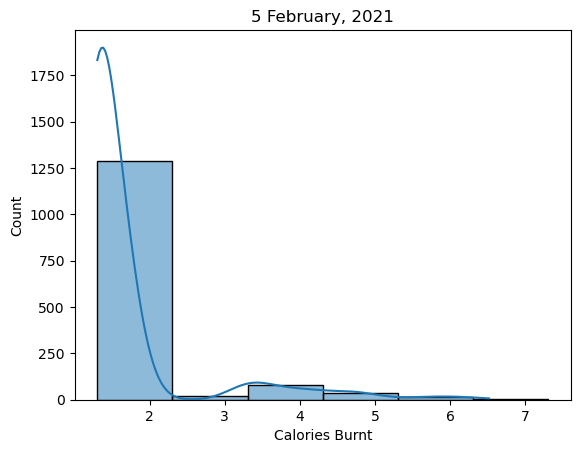

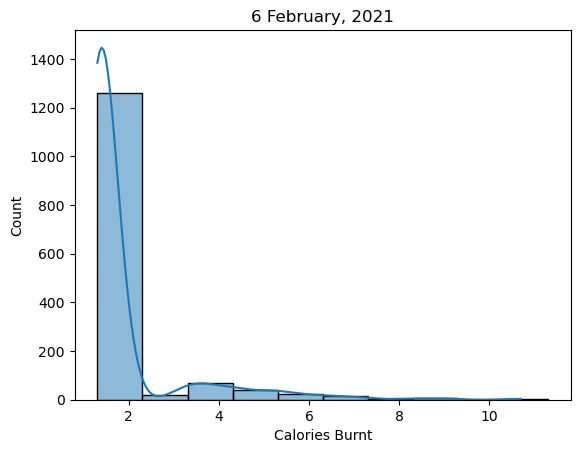

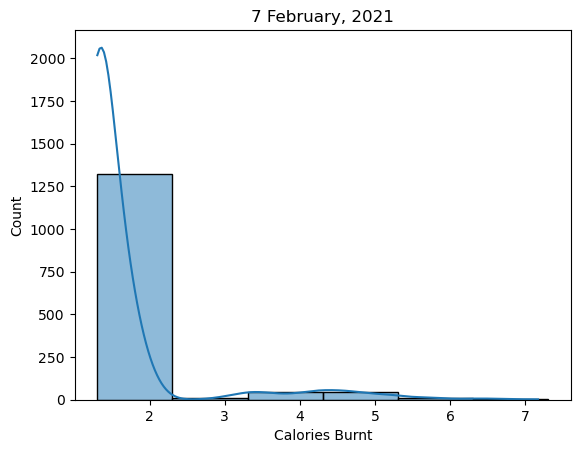

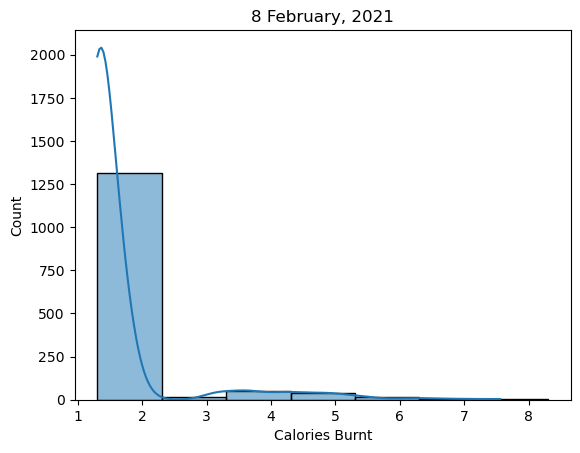

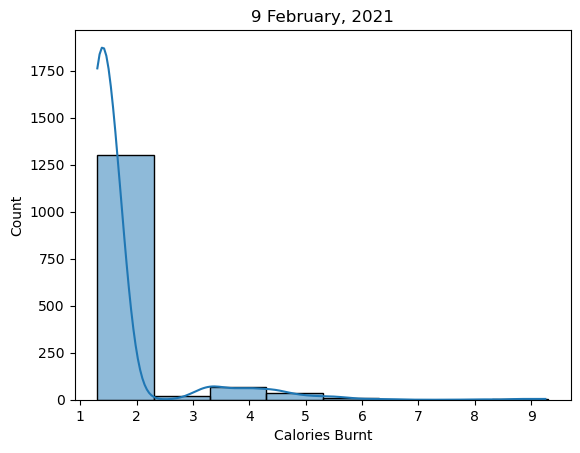

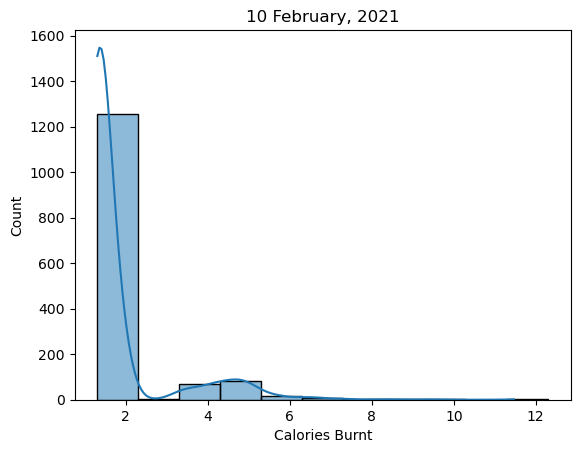

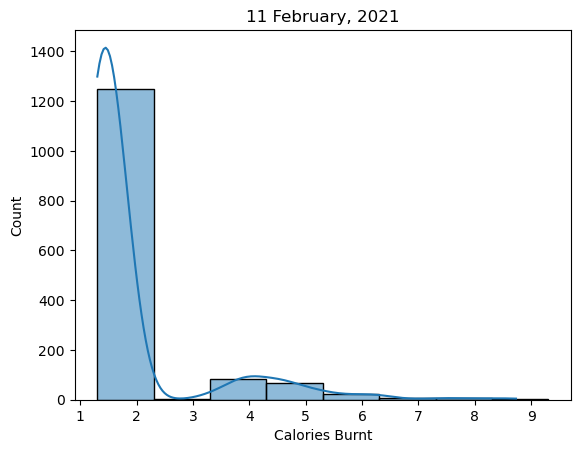

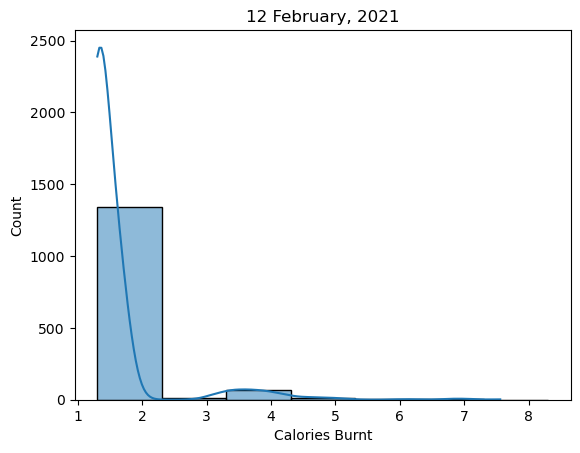

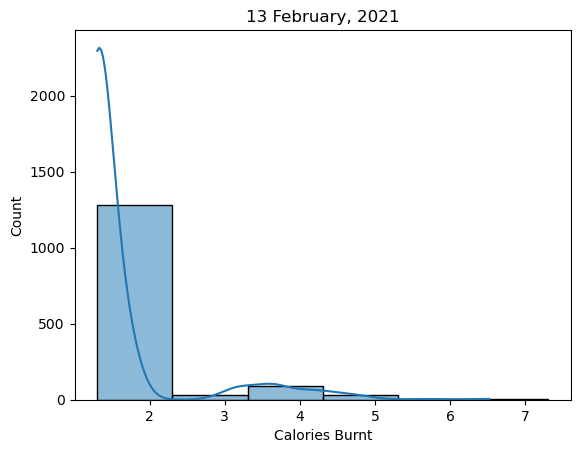

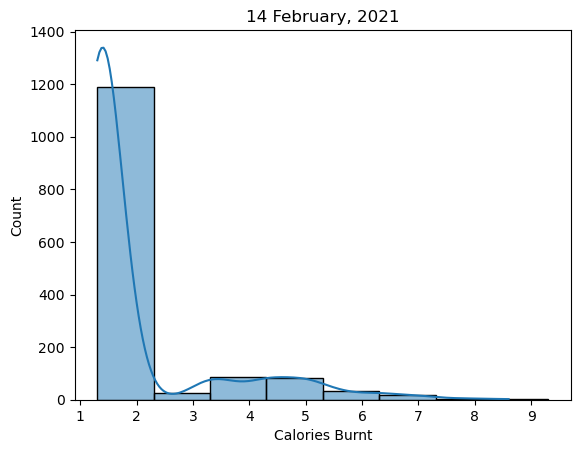

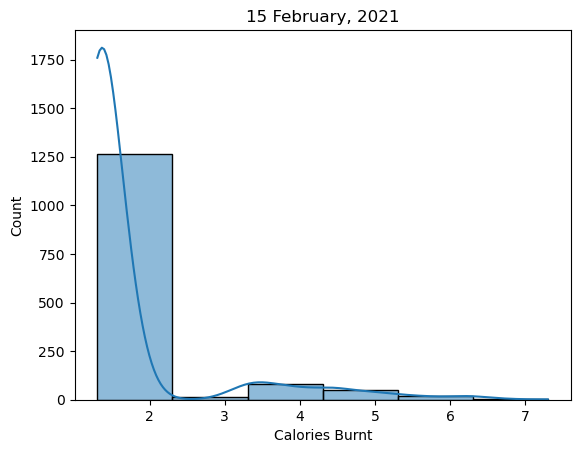

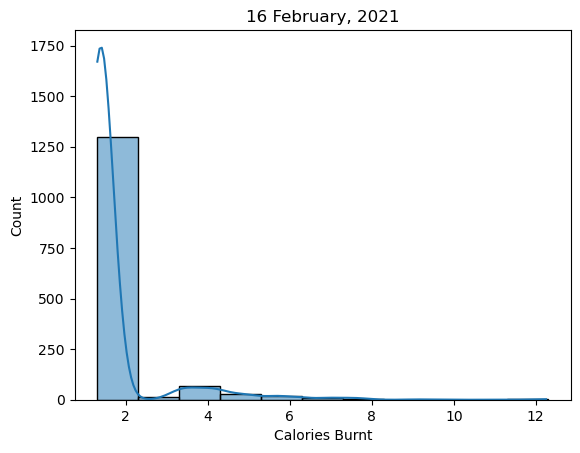

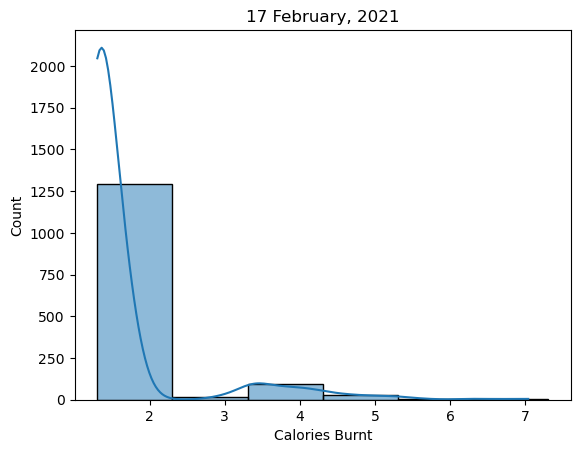

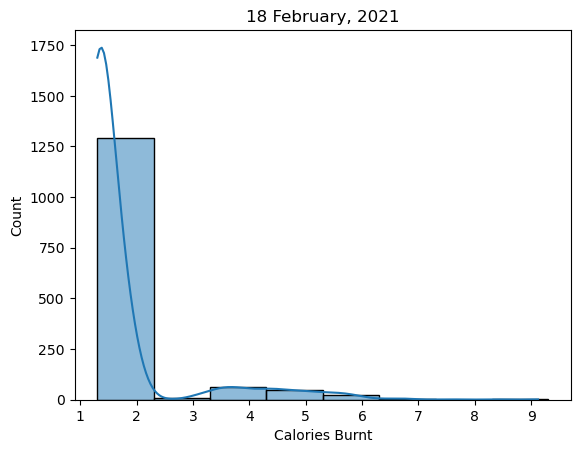

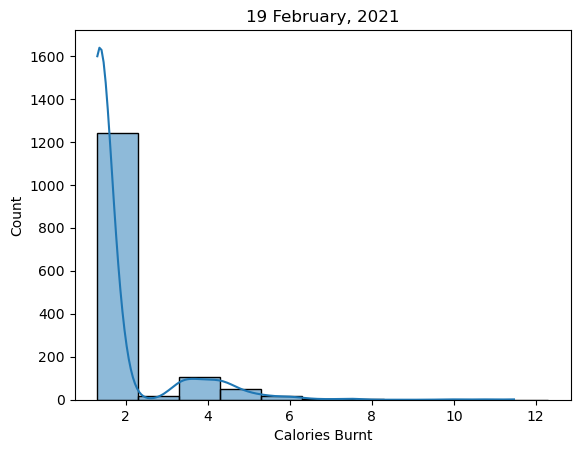

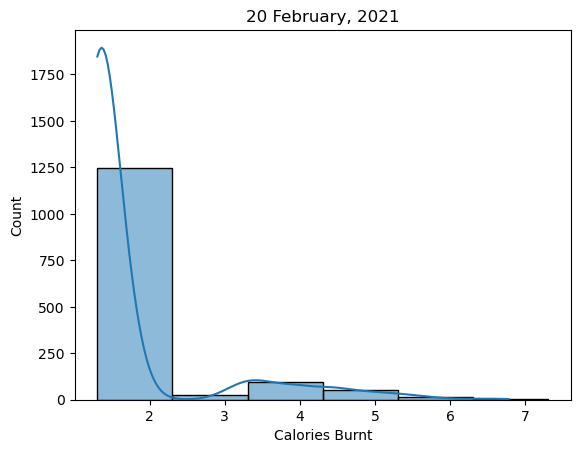

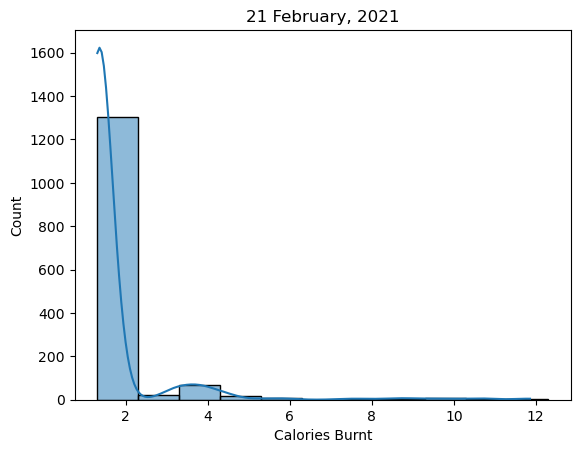

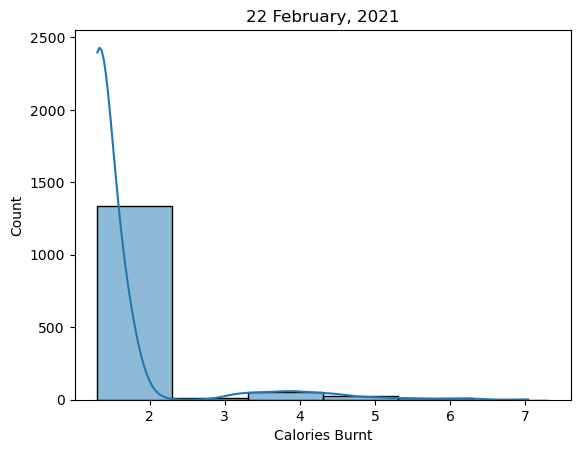

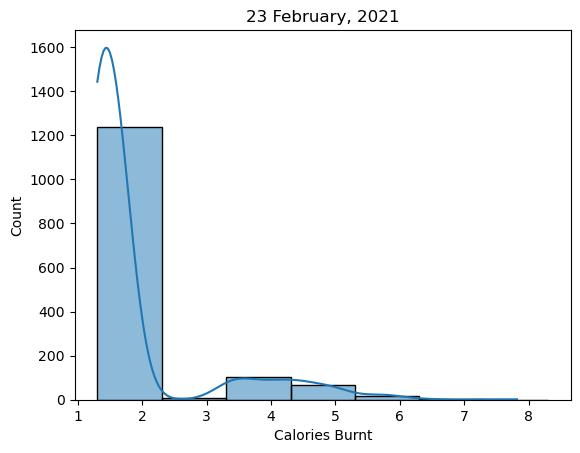

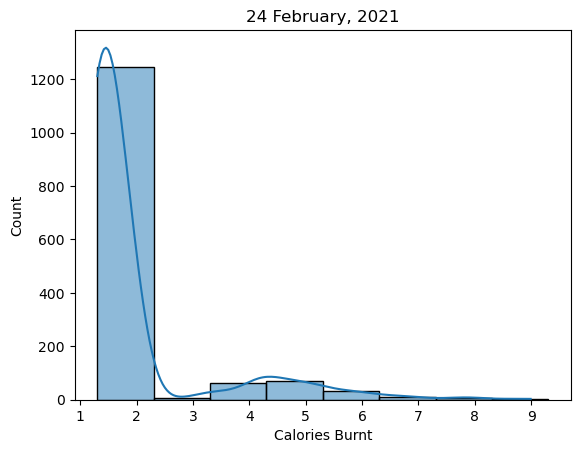

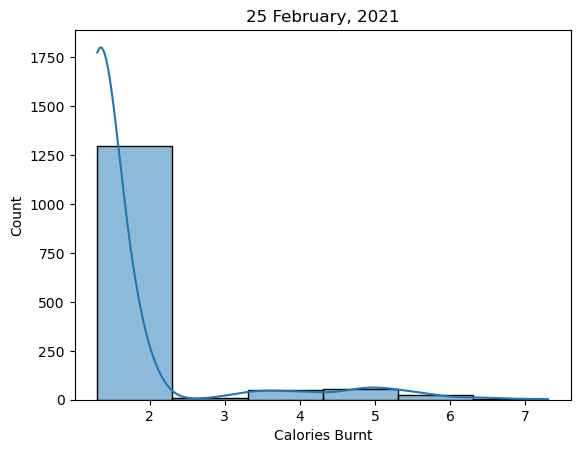

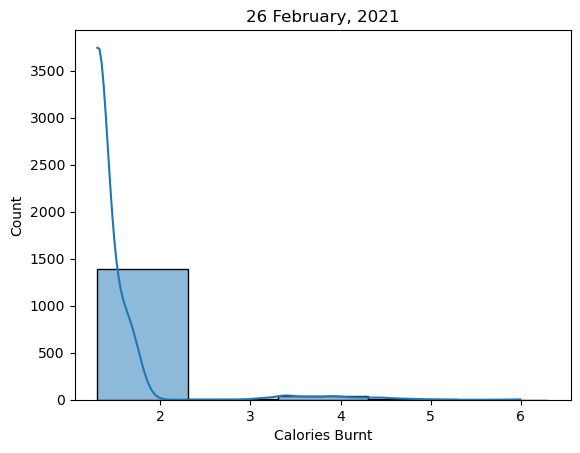

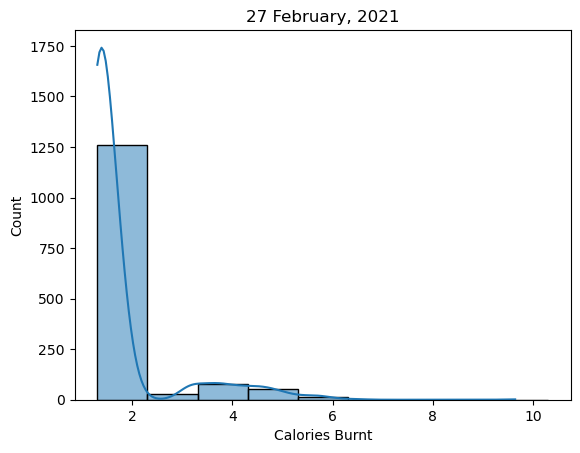

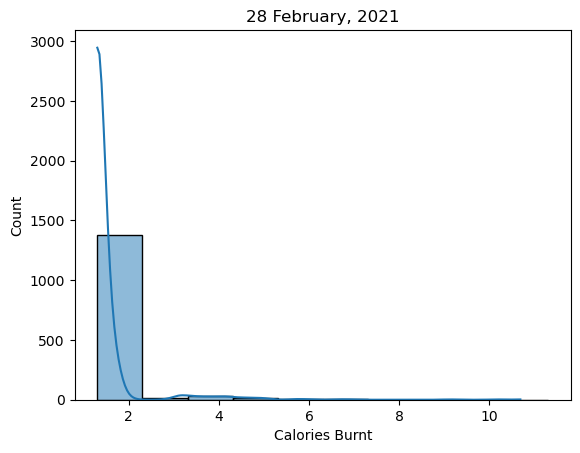

In [597]:
#step data, calories burnt and elevation is mostly 0 so visualizing the data distribution per day isnt that insightful
for i in range(1,29):
    exec("sns.histplot(df%d_step['Calories Burnt'],binwidth=1,kde=True)"%(i))
    exec("title='%d February, 2021'"%(i))
    exec("plt.title('%s')"%(title))
    #exec("plt.savefig('%shistplot.jpg', dpi=300, bbox_inches='tight')"%(title))
    exec("plt.show()")

[]

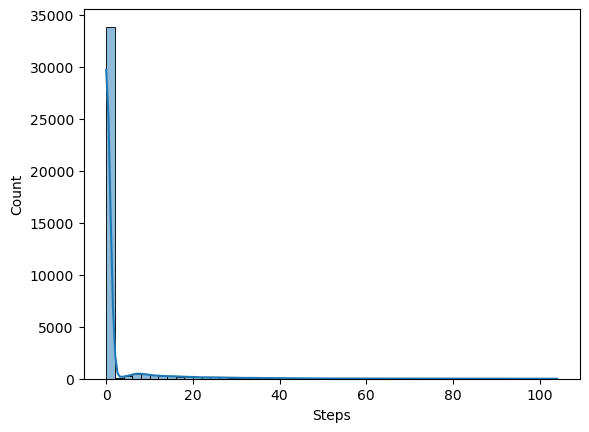

In [605]:
sns.histplot(data=df_feb_alldata,x='Steps',binwidth=2,kde=True)
plt.savefig('Stepshistplot.jpg', dpi=300, bbox_inches='tight')
plt.plot()

[]

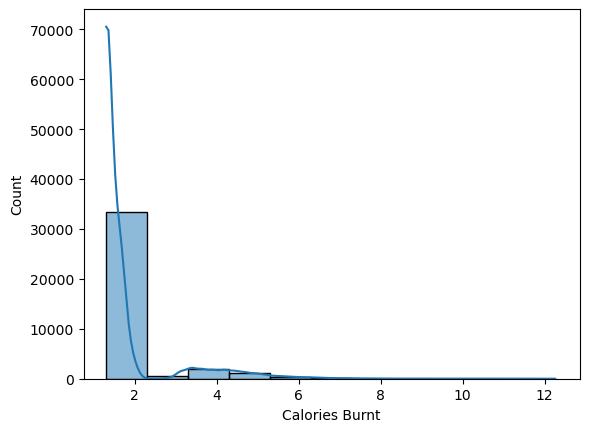

In [604]:
sns.histplot(data=df_feb_alldata,x='Calories Burnt',binwidth=1,kde=True)
plt.savefig('Calorieshistplot.jpg', dpi=300, bbox_inches='tight')
plt.plot()

[]

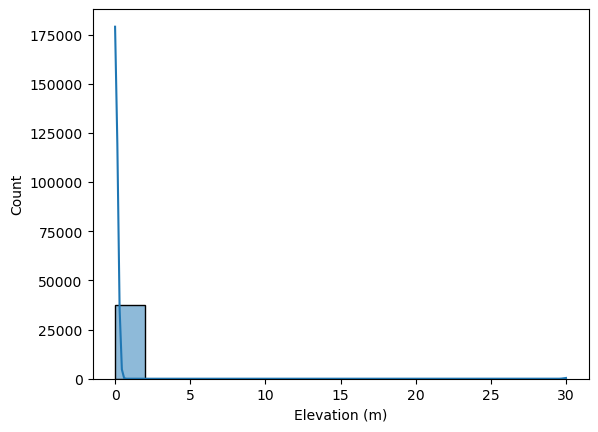

In [606]:
sns.histplot(data=df_feb_alldata,x='Elevation (m)',binwidth=2,kde=True)
plt.savefig('Elevationhistplot.jpg', dpi=300, bbox_inches='tight')
plt.plot()

[]

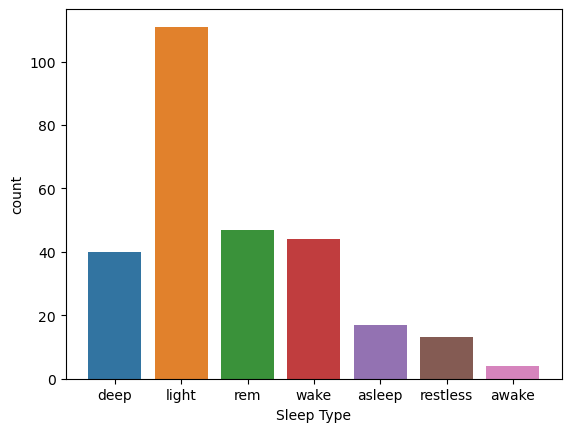

In [610]:
sns.countplot(x='Sleep Type',data=df_feb_alldata)
plt.savefig('Sleeptype.jpg', dpi=300, bbox_inches='tight')
plt.plot()

[]

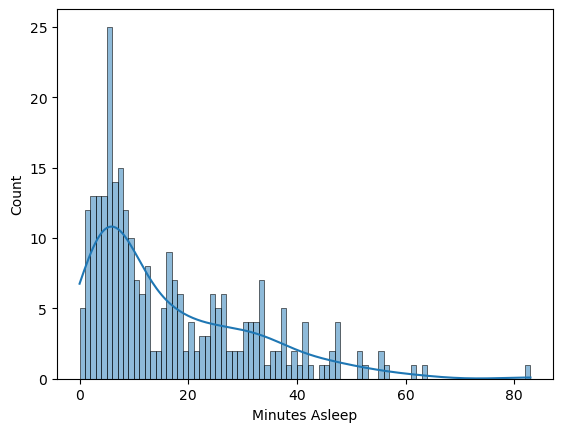

In [609]:
sns.histplot(data=df_feb_alldata,x='Minutes Asleep',binwidth=1,kde=True)
plt.savefig('Sleephistplot.jpg', dpi=300, bbox_inches='tight')
plt.plot()